# **Music Recommendation System**

# **Executive summary**

## **Problem Definition**

### **The Context:**

 In today's digital age, music streaming platforms like Spotify offer millions of tracks to users. However, the sheer volume of available content can make it overwhelming for users to discover new music that aligns with their tastes. Recommender systems play a crucial role in enhancing user experience by suggesting songs that match individual preferences.

 Providing accurate and personalized music recommendations increases user engagement, satisfaction, and retention on the platform. It also benefits artists by improving the discoverability of their work.

### **The objective:**

The main goal is to build a music recommendation system that suggests relevant songs to Spotify users based on their listening history and song attributes. This system should be able to recommend both familiar tracks and introduce users to new, yet relevant, songs.

### **The key questions:**

* How can we represent users and songs numerically for modeling?

* How can we measure similarity between songs and/or users?

* Can we identify the most relevant songs for a user based on their past behavior?

* Can we incorporate song metadata (e.g., artist, genre, release) to improve recommendations?

### **The problem formulation:**

Using data science techniques, we aim to predict and recommend songs that a user is likely to enjoy. This involves analyzing user-song interaction data, extracting meaningful features, and applying appropriate algorithms (such as collaborative filtering or content-based methods) to generate personalized song suggestions.

### **History of the solution:**

​Initially, a global approach was adopted to develop the solution, treating all users uniformly. In a subsequent iteration, users were segmented based on their behavioral profiles, and personalized strategies were designed for each group. These strategies are grounded in the specific characteristics of the users. For instance, for users who are highly loyal to a small set of artists, it is advisable to recommend songs from the same or similar artists. Conversely, for users who prefer variety, it may be more effective to recommend songs based on the listening habits of other users with similar preferences.​

This segmentation approach aligns with practices employed by major streaming platforms like Spotify, which utilize clustering algorithms such as K-means to group users with similar listening behaviors. By analyzing factors like preferred genres, listening times, and artist loyalty, these platforms can tailor recommendations to individual user profiles, enhancing the overall user experience.


### **The most important findings include:**

* User listening behavior varies significantly, with some users listening to the same song many times, while others listen only once. This affects how the models should interpret and predict play count. There is a wide behavioral diversity among users, with some showing strong repetition patterns and loyalty, while others explore a broad range of content.

* The clustering analysis revealed six well-differentiated segments with clear patterns in terms of engagement, loyalty, and diversity. Notably, two of the six clusters showed similar behaviors and were later merged for analysis purposes, as they represented overlapping user profiles with only minor differences in intensity.

* Each cluster allows for the design of a custom recommendation strategy aligned with the user's profile.

<br><br/>
**Final Proposed Model Specifications:**

​The customer segments to be treated differently are as follows:

|Cluster|Name|Description|
|-----------|-----------|-----------|
|NA| ❄️	Cold-Start Users and No Cluster Users|	Users with little or no listening history, and users without an assigned cluster|
|0|	🎧 Focused Repeater|	Users who listen to a few songs many times. High loyalty to the top artist and strong concentration on the top 3 songs.|
|1|	🔄 Casual Explorers|	Users with more unique songs, low play counts, and lower loyalty. They seem to use the app in a lighter and more varied way.|
|2|	🔁 Heavy Repeat Listeners| High play count concentrated on a few songs. High intensity, high repetition, but still some diversity.|
|3|	🌍 Diverse Explorers|	Users with very high diversity (many songs), but low loyalty. They listen a lot, but in a scattered way.|
|4|	🔬 Moderate Explorers| Mixed behavior: good diversity, moderate intensity, low loyalty. Fairly balanced users.|

​Each customer segment will have its own personalized recommendation strategy, tailored to what is considered most appropriate based on their behavioral profile within the application.


# **Problem and solution summary**

**Problem:**
Music recommendation systems often rely on general collaborative filtering without considering the behavioral diversity among users. This results in suboptimal recommendations for certain types of users (e.g., those with niche tastes or erratic behavior).

**Proposed Solution:**
We propose a behavior-based user segmentation model to tailor recommendation strategies to different user types. The rationale is that not all users interact with music the same way, so a one-size-fits-all approach fails to meet expectations. By clustering users based on listening behavior, we can:

* Increase the relevance of recommendations.

* Improve user engagement and satisfaction.

* Enhance platform retention through personalized experiences.

<br><br/>
**Impact on Business:**

* Higher user retention and lower churn.

* Increased engagement metrics (e.g., time on app, number of plays).

* Potential for targeted marketing, premium upsell, and content promotion based on user type.

<br><br/>
**Diagram of the solution:**

|Cluster|Name|Recommendation|Name of Models|
|-----------|-----------|-----------|----------|
|NA| ❄️	Cold-start users and No Cluster Users|	Popularity-Based Recommendation Systems - General|top_songs_info|
|0|	🎧 Focused Repeater|	Content-Based Recommendation Systems using top 3 of more listening songs|Function songs_recommendations|
|1|	🔄 Casual Explorers|Popularity-Based Recommendation Systems in Cluster 1 with min_interaction = 100| top_songs_info_c1|
|2|	🔁 Heavy Repeat Listeners| SVD + Content-Based Recommendation Systems using top 3 of more listening songs| svd_optimized_c2 + Function songs_recommendations|
|3|	🌍 Diverse Explorers|	SVD + Content-Based Recommendation Systems using top 3 of more listening songs | svd_optimized_c3 + Function songs_recommendations|
|4|	🔬 Moderate Explorers| User-User + Popularity-Based Recommendation Systems in Cluster 4 with min_interaction = 100| sim_user_user_c4 + top_songs_info_c4|

<br><br/>
In all cases, **10 songs will be recommended**.

In the NA cluster (**Cold-Start Users and No Cluster Users**), for new users or users who cannot be classified into any predefined cluster, a **Popularity-Based Recommendation System - General** will be used, as there is not enough information about the users to understand their preferences and make more personalized recommendations.

In cluster 0 (**Focused Repeater**), formed by people with few plays overall (on average 18 plays, corresponding to 7 songs), but with quite a few repeats of the same song and high preferences for the same artists and songs (they play each song on average 2.5 times, and the most listened-to artist covers about 60% of the plays), the suggestion is to select the top 3 most played songs and look for the 10 most similar songs to those 3 (**content-based recommendation**).

In cluster 1 (**Casual Explorers**), although they have relatively few plays (on average 30), they are more distributed among various artists and songs (the most listened-to artist accounts for only 26% of the total plays, and they have listened to an average of 16 songs each), the suggestion is to recommend based on the **Popularity-Based Recommendation System**, but focusing on the songs listened to by users in this cluster.

For clusters 2 (**Heavy Repeat Listeners**), 3 (**Diverse Explorers**), and 4 (**Moderate Explorers**), where they already concentrate more plays on average per user (between 130 and 440), the suggestion is that part of the solution should use a **user-user-based model, SVD, or clustering-based recommendations**. To generate these models, training is done with the subsegment of each cluster to make the algorithm more efficient. The algorithm that generates the lowest RMSE and the highest F1-SCORE is selected, and hyperparameters are tuned with grid search.

Clusters 2 and 3 will be combined with the result of the Content-Based algorithm, where 5 songs similar to the top 3 most listened-to songs will be recommended. Cluster 4 will be combined with the result of the Popularity-Based Recommendation System, but focusing on the songs listened to by users in this cluster.

***Aclaration about GridSearch:***
Hyperparameter tuning using GridSearch was performed once, but since it took too long to run, the results were saved and then applied in the following cell. As this document went through several later adjustments, to avoid long execution times, the hyperparameter search was not rerun.


<br><br/>
**Metrics in Train (clusters 2, 3 and 4):**

|Cluster|Model|RMSE|F1-Score|
|-----------|-----------|-----------|----------|
|2|	Cluster Based|1.7884|0.768|
|2|	User-User-Similarity-Based|1.9243|0.77|
|2|	SVD|1.6646|0.789|
|2| SVD Optimized| 1.6512|0.79|
|3|	Cluster Based|1.4324| 0.591|
|3|	User-User-Similarity-Based| 1.5250| 0.599|
|3|	SVD|1.3762|0.601|
|3| SVD Optimized| 1.3500|0.617|
|4|	Cluster Based|1.3193| 0.563|
|4|	User-User-Similarity-Based| 1.4105| 0.583|
|4|	SVD|1.2858|0.573|

<br><br/>
**Other Validation Metric**

To validate the effectiveness of the recommendation strategy, **300** random users were selected. The dataset was divided into two parts: **80% was allocated to the "historical" data**, used to generate recommendations based on the defined strategy, and **20% was kept for "prediction" data**, to assess whether users eventually listened to any of the recommended songs. If the recommender system is efficient, we would expect a high percentage of the recommended songs to have been listened to.

This approach follows standard practices in recommender system evaluation, where historical data is used to train the model, and subsequent data is used to test its predictive performance. These methods help in assessing the model's ability to generalize and provide relevant recommendations to users.

However, the results of the analysis were relatively low, with listening rates for recommended songs varying between 0% and 5% across the different clusters.

|Cluster|	Count of Songs Recommended	|Songs Listened	|Pct|
|-----------|-----------|-----------|----------|
|0|	130|	5|	4%|
|1|	730	|2|	0%|
|2|	250	|4|	2%|
|3|	60	|3|	5%|
|4|	500	|1|	0%|






# **Recommendations for implementation**

**Key Recommendations:**

* Integrate the clustering pipeline into the user profiling backend. In this document, there is a section titled "Design of the Pipeline to Use" where a series of functions are presented. These functions allow, by defining the user_id and the set of historical data, to calculate the behavior profile cluster to which the user belongs, and based on that, display the recommendation strategy with 10 songs suggested by the algorithm. This would serve as a starting point for designing the final pipeline to be put into production.

* Associate each user with a dynamic cluster label that can be updated over time. This is truly a challenge, since both the clusters that classify users based on their behavior profiles and the corresponding recommendations and algorithms must be constantly updated, including all the new songs the user listens to.

* A/B test different strategies per cluster to validate effectiveness and fine-tune personalization.


**Expected Benefits / Costs:**

* **Benefits:** Increased user satisfaction, personalized experience, stronger loyalty, better conversion for new features or content.

* **Costs:** Computational overhead for clustering and recommendation logic, potential initial resource allocation for implementation and testing.

**Risks / Challenges:**

* Behavioral shifts over time may require dynamic re-clustering or adaptive models. To detect this, a monitoring system should be developed to track the variables that define each behavior cluster and their key metrics, in order to identify any deviations from the initial assumptions, variable miscalibration, or even the possibility that the classification may no longer be useful.

* Cold-start users (with limited data) may be harder to classify correctly. The proposed solution in this case is very generic. If more information about the users becomes available, a sub-segmentation of this user group could be attempted to provide more suitable recommendations to similar users (e.g., teenage users vs. adult users).

* Segment-specific models may need maintenance and tuning as the app evolves.


**Further Analysis Needed:**

* Explore temporal models to detect seasonality or time-of-day patterns in listening behavior.

* Evaluate performance metrics per cluster to refine strategies.

* The model of Content-Based Recommendation Systems, relies solely on song, album, or artist names. It would be interesting to include more information about the songs, such as their duration, the instruments involved, the song lyrics, and the song's language, to make these recommendations more efficient.

<br><br/>
**Conclusion**

​While the recommendation system was designed to be personalized according to user behavior profiles within the application, and tailored solutions were developed for each user group, the final validation comparing recommendations to listened songs yielded relatively low results. This serves as a solid starting point, but further work is needed to incorporate and test different techniques for selecting recommendations, as well as to gather more information about both users and songs.​

Understanding when during the day, week, or even month a user listens to certain songs can be a relevant factor in making effective recommendations. Additionally, having other characteristics, such as age, gender, and location, can help improve the system. Regarding songs, knowing the musical genre, duration, lyrics, or specific rhythmic patterns can be very useful when creating better recommendations.​

Incorporating contextual information, such as time of day, user activity, and environmental factors, has been shown to enhance the accuracy of music recommendations. For instance, users often have different music preferences depending on the time of day, and modeling these temporal patterns can improve recommendation relevance. Additionally, integrating user demographics and emotional states can further personalize recommendations, leading to a more engaging user experience.​

In summary, to improve the effectiveness of the recommendation system, it is essential to integrate contextual and demographic information, as well as to explore advanced modeling techniques that capture the dynamic nature of user preferences. This approach will enable the delivery of more accurate and personalized music recommendations.

<br><br/>
**Next Steps:**

* Explore Alternative Techniques for User Segmentation and Recommendation Generation: Investigate advanced methods such as hybrid filtering, emotion-aware models, and context-aware re-ranking to enhance recommendation accuracy.​


* Incorporate Comprehensive User and Song Data: Utilize demographic, behavioral, and contextual information to create more personalized and relevant recommendations.​

* Include Contextual Information: Analyze factors like time of day, day of the week, and user activity to tailor recommendations to the user's current context.

* Explore and Propose Additional Evaluation Metrics: Implement metrics such as precision, recall, F1 score, and novelty to assess the effectiveness of recommendations and their impact on user engagement.​

* Plan A/B Testing with Control and Strategy Groups: Conduct controlled experiments to measure the true impact of recommendation strategies on user behavior and satisfaction.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [1]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import pandas as pd
import numpy as np

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [2]:
!pip install py7zr

In [3]:
# Importing the datasets
# Observation: Since the CSV file was too large to upload to GitHub and then import from a URL,
# it was decided to compress it first and then import it from GitHub.
import requests
import py7zr
from io import BytesIO

# Song Data

# Set URL which contains the  compressed file
url = 'https://raw.githubusercontent.com/xlisouski/MIT_Projects/refs/heads/main/Capstone Project - RS/song_data.7z'

# Sends a GET request to the specified URL and retrieves the response
response = requests.get(url)

# Check if the response was successful
if response.status_code == 200:
    # Use BytesIO to treat the content as an in-memory file
    compressed_file = BytesIO(response.content)

    # Decompress the file in memory
    with py7zr.SevenZipFile(compressed_file, mode='r') as z:
        # Extract all contents
        z.extractall(path="song_data")

    print("File extracted successfully.")
else:
    print("Failed to retrieve the file from the URL.")

# Load the CSV file into a DataFrame
song_df = pd.read_csv("song_data/song_data.csv")


# Count Data

# Set URL which contains the  compressed file
url = 'https://raw.githubusercontent.com/xlisouski/MIT_Projects/refs/heads/main/Capstone Project - RS/count_data.7z'

# Sends a GET request to the specified URL and retrieves the response
response = requests.get(url)

# Check if the response was successful
if response.status_code == 200:
    # Use BytesIO to treat the content as an in-memory file
    compressed_file = BytesIO(response.content)

    # Decompress the file in memory
    with py7zr.SevenZipFile(compressed_file, mode='r') as z:
        # Extract all contents
        z.extractall(path="count_data")

    print("File extracted successfully.")
else:
    print("Failed to retrieve the file from the URL.")

# Load the CSV file into a DataFrame
count_df = pd.read_csv("count_data/count_data.csv")

File extracted successfully.
File extracted successfully.


### **Understanding the data by viewing a few observations**

In [4]:
# Display first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
# Display first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [6]:
# Display info of count_df
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [7]:
# Nulls Analysis
count_df.isnull().sum()

,0
Unnamed: 0,0
user_id,0
song_id,0
play_count,0


In [8]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [9]:
# Nulls Analysis
song_df.isnull().sum()

,0
song_id,0
title,17
release,7
artist_name,0
year,0


In [10]:
# Other missing values
print('Number of rows with Year = 0:',(song_df['year'] == 0).sum())

Number of rows with Year = 0: 484424


In [11]:
# Check the shape of the data
print('Count Data:')
print('Number of Rows: ',count_df.shape[0])
print('Number of Columns: ',count_df.shape[1])
print('')
print('Song Data:')
print('Number of Rows: ',song_df.shape[0])
print('Number of Columns: ',song_df.shape[1])

Count Data:
Number of Rows:  2000000
Number of Columns:  4

Song Data:
Number of Rows:  1000000
Number of Columns:  5


#### Observations:

**Count Data:**

* count_df has 2,000,000 of rows and 4 columns, without nulls values.
* user_id and song_id are read as an 'object' data type.
* play_count is read as a 'int64' data type. This is the metric we will use to understand our users' musical preferences. A higher number of plays indicates a greater preference for that song.

**Song Data:**

* song_df has 1,000,000 of rows and 5 columns.
* song_id, tittle, release and artist_name are read as an 'object' data type.
* tittle and release have a few missing values. We will delete these records so they do not affect the quality of the final solution.
* year is read as a 'int64' data type, and it has 484,424 values = 0. It is important to have a strategy to fill in all these values, as they represent almost half of the songs.


In [12]:
# Delete rows with missing values in tittle or release columns
song_df = song_df.loc[(song_df['title'].isnull() == False) & (song_df['release'].isnull() == False)]
print('Song Data:')
print('Number of Rows: ',song_df.shape[0])
print('Number of Columns: ',song_df.shape[1])

Song Data:
Number of Rows:  999976
Number of Columns:  5


### Songs with Year = 0 Analysis

In [13]:
# Created a boolean variable
song_df['year_missing'] = np.where(song_df['year'] == 0, 1, 0)

# Create a summarized analysis by artist
songs_without_years = song_df.groupby(['release']).agg(
    Count = ('year', 'count'),
    Count_YearMissing = ('year_missing', 'sum'),
    year_release = ('year','max')
).reset_index()

# Filter by artists with missing years
songs_without_years = songs_without_years.loc[songs_without_years['Count_YearMissing']>0]

# Print Results
print('Number of Releases with songs without years:', songs_without_years.shape[0])
print('')
print('Number of Releases with any year data:', songs_without_years.loc[songs_without_years['year_release']>0].shape[0])
print('')
print('Releases with any year data:')
songs_without_years.loc[songs_without_years['year_release']>0].sort_values(by = 'Count_YearMissing', ascending = False)

Number of Releases with songs without years: 97269

Number of Releases with any year data: 32905

Releases with any year data:


,release,Count,Count_YearMissing,year_release
50393,Greatest Hits,2014,690,2010
72108,Live,1197,484,2009
130960,The Ultimate Collection,791,376,2009
131206,The Very Best Of,741,318,2010
128557,The Platinum Collection,566,310,2009
...,...,...,...,...
77949,Martin Scorsese Presents The Blues: J.B. Lenoir,11,1,2003
77956,Martin Sexton Live at Gathering Of The Vibes 2...,5,1,2001
77970,Marty Wilde,3,1,2007
77996,Mary Wells The Hits,3,1,2006


In [14]:
# Do the same process but with the artist
# Create a summarized analysis by artist
songs_without_years_art = song_df.groupby(['artist_name']).agg(
    Count = ('year', 'count'),
    Count_YearMissing = ('year_missing', 'sum'),
    year_artist = ('year','max')
).reset_index()

# Filter by artists with missing years
songs_without_years_art = songs_without_years_art.loc[songs_without_years_art['Count_YearMissing']>0]

# Print Results
print('Number of Artists with songs without years:', songs_without_years_art.shape[0])
print('')
print('Number of Artists with any year data:', songs_without_years_art.loc[songs_without_years_art['year_artist']>0].shape[0])
print('')
print('Artists with any year data:')
songs_without_years_art.loc[songs_without_years_art['year_artist']>0].sort_values(by = 'Count_YearMissing', ascending = False)

Number of Artists with songs without years: 55814

Number of Artists with any year data: 20921

Artists with any year data:


,artist_name,Count,Count_YearMissing,year_artist
49432,Petra,161,159,1996
62900,The Doors,171,142,2008
40882,Mark Lowry,142,137,2004
10121,Carl Perkins,140,137,2002
56870,Simon Harris,140,136,1990
...,...,...,...,...
61227,Tears For Fears,113,1,2007
48955,Pebbles,4,1,1990
61263,Technicolor,5,1,2000
35549,L'Aura feat. Max Zanotti,2,1,2007


#### Observations:

There are a total of **484,424** songs with year = 0, corresponding to **97,269 releases**. Among those releases, **32,905 have at least one song with an assigned year**. In those cases, the missing year will be replaced with the latest year in which that artist released a song.

Regarding the artists, the songs with year = 0 correspond to **55,814 unique artists**, of which **20,921 have at least one song with known release year information**.

The logic to fill in missing values in the year column will be as follows:

* If year > 0 → keep the original year

* Else, if year_release > 0 → impute with year_release

* Else, if year_artist > 0 → impute with year_artist

* Else, median of years with data


In [15]:
# Join song data with year of release data
songs_max_year = songs_without_years[['release', 'year_release']].drop_duplicates()
song_df = pd.merge(song_df, songs_max_year, on='release', how='left')

# Join song data with year of artists data
songs_max_year_art = songs_without_years_art[['artist_name', 'year_artist']].drop_duplicates()
song_df = pd.merge(song_df, songs_max_year_art, on='artist_name', how='left')

# Calculated year median
median_year = song_df.loc[song_df['year']>0, 'year'].median()
print('Median Year:', median_year)

# Created year_replaced with priority logical
conditions = [
    song_df['year'] > 0,
    song_df['year_release'] > 0,
    song_df['year_artist'] > 0
]

choices = [
    song_df['year'],
    song_df['year_release'],
    song_df['year_artist']
]

song_df['year_replaced'] = np.select(conditions, choices, default=median_year)

# Print results
song_df.head()

Median Year: 2002.0


,song_id,title,release,artist_name,year,year_missing,year_release,year_artist,year_replaced
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003,0,NaN,NaN,2003.0
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995,0,NaN,NaN,1995.0
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006,0,NaN,2009.0,2006.0
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003,0,NaN,2007.0,2003.0
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,1,0.0,0.0,2002.0


In [16]:
# Print examples
song_df.loc[song_df['year']==0].head(10)

,song_id,title,release,artist_name,year,year_missing,year_release,year_artist,year_replaced
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0,1,0.0,0.0,2002.0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0,1,0.0,0.0,2002.0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0,1,2006.0,0.0,2006.0
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0,1,0.0,0.0,2002.0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0,1,0.0,0.0,2002.0
12,SOQQESG12A58A7AA28,Cold Beer feat. Prince Metropolitan,International Hardcore Superstar,Danny Diablo,0,1,0.0,2007.0,2007.0
14,SOGPCJI12A8C13CCA0,N Gana,Afropea 3 - Telling Stories To The Sea,Waldemar Bastos,0,1,1988.0,2008.0,1988.0
19,SOVMBTP12A8C13A8F6,La bola extra,La bola extra,Los Ronaldos,0,1,2007.0,2007.0,2007.0
20,SOOUESZ12AB0189AFD,I Made It Over,Let's Celebrate (He Is Risen),Rev. Timothy Wright,0,1,0.0,0.0,2002.0
21,SOAGMGG12A6D4F9099,Debussy : 12 Etudes : VI Pour les huit doigts,Debussy : 12 Etudes_ Images Sets 1 & 2,Pierre-Laurent Aimard,0,1,0.0,2003.0,2003.0


In [17]:
# Print number of year = 0 after replaced
print('Number of songs without replaced:',(song_df['year_replaced']==0).sum())

Number of songs without replaced: 0


### Merge count_df and song_df

In [18]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
merged_df = pd.merge(count_df, song_df[['song_id', 'title', 'release', 'artist_name', 'year','year_replaced']], on='song_id', how='left').drop_duplicates(subset=['song_id', 'user_id'])

# Drop the column 'Unnamed: 0'
merged_df = merged_df.drop(columns=['Unnamed: 0'], errors='ignore')

## Name the obtained dataframe as "df"
df = merged_df

# Copy the complete df
merged_df = merged_df.copy()

# Print head df
df.head()

,user_id,song_id,play_count,title,release,artist_name,year,year_replaced
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,2003.0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,1976.0
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,2007.0
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,2005.0
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,1999.0


In [19]:
# Check duplicates
resume = df.groupby(['song_id', 'user_id']).count().reset_index()
resume.loc[resume['play_count'] > 1]

,song_id,user_id,play_count,title,release,artist_name,year,year_replaced


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [20]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
song_encoder = LabelEncoder()

df['user_encoded'] = user_encoder.fit_transform(df['user_id'])
df['song_encoded'] = song_encoder.fit_transform(df['song_id'])

df.head()

,user_id,song_id,play_count,title,release,artist_name,year,year_replaced,user_encoded,song_encoded
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,2003.0,54961,153
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,1976.0,54961,413
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,2007.0,54961,736
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,2005.0,54961,750
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,1999.0,54961,1188


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [21]:
# Check the shape of the data
print('Number of Rows: ',df.shape[0])
print('Number of Columns: ',df.shape[1])

Number of Rows:  2000000
Number of Columns:  10


In [22]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [23]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [24]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [25]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [26]:
# Check first 5 rows
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year,year_replaced,user_encoded,song_encoded
209,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBDVAK12AC90759A2,1,Daisy And Prudence,Distillation,Erin McKeown,2000,2000.0,6958,447
211,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBIMTY12A6D4F931F,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,2004.0,6958,512
212,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBKRVG12A8C133269,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,2007.0,6958,549
213,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBUBLL12A58A795A8,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,2007.0,6958,703
214,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBVKFF12A8C137A79,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,2007.0,6958,719


Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [27]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [28]:
# Check the shape of the data
print('Number of Rows: ',df_final.shape[0])
print('Number of Columns: ',df_final.shape[1])

Number of Rows:  117876
Number of Columns:  10


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [29]:
# Display total number of unique user_id
unique_user_ids = df_final['user_id'].nunique()
print(f"Unique user IDs: {unique_user_ids}")

Unique user IDs: 3155


Total number of unique song id

In [30]:
# Display total number of unique song_id
unique_song_ids = df_final['song_id'].nunique()
print(f"Unique song IDs: {unique_song_ids}")

Unique song IDs: 563


Total number of unique artists

In [31]:
# Display total number of unique artists
unique_artists = df_final['artist_name'].nunique()
print(f"Unique Artists: {unique_artists}")

Unique Artists: 232


#### Observations:
The sample includes information from **3,155 users** and **563 songs corresponding to 232 artists** (an average of **2.3 songs per artist**).


### **Let's find out about the most interacted songs and interacted users**

In [32]:
# With barchart:
def bar_perc(data, feature, top, rotate_axis=False, figsize = (15,5), add_others = True):

    total = len(data[feature]) # Length of the column
    plt.figure(figsize = figsize)

    # Convert the column to a categorical data type
    data[feature] = data[feature].astype('category')

    # Get the top n categories, if there are more than the limit
    if (data[feature].value_counts().count() > top):
        top_categories = data[feature].value_counts().nlargest(top).index
    else:
        top_categories = data[feature].value_counts().index

    # Get the variable to graph
    x_graph = data[feature].apply(lambda x: x if x in top_categories else 'Others')  # Group the rest as 'Others'

    # Convert in category
    x_graph = x_graph.astype('category')

    # Ensure 'Others' is always at the end, if it is neccesary
    if (data[feature].value_counts().count() > top):
        category_order = [cat for cat in x_graph.value_counts().index if cat != 'Others']
        if (add_others == True):
            category_order.append('Others')  # Add 'Others' at the end
    else:
        category_order = x_graph.value_counts().index

    # Personalize the rotate axis in function of the number of categories
    if (rotate_axis == True):
        ax = sns.countplot(y=x_graph, palette='Paired', order=category_order)

        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width() / total)  # Percentage of each class
            x = p.get_x() + p.get_width() + 0.05  # Positioning the annotation next to the bar (slightly to the right)
            y = p.get_y() + p.get_height() / 2  # Adjust the vertical placement
            ax.annotate(percentage, (x, y), size=12)  # Annotate the percentage

    else:
        ax = sns.countplot(x=x_graph, palette='Paired', order=category_order)

        # Rotate the x-axis labels
        if(x_graph.value_counts().count() > 10):
            plt.xticks(rotation=90)
        if(x_graph.value_counts().count() > 6):
            plt.xticks(rotation=45)

        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
            x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
            y = p.get_y() + p.get_height()                              # Height of the plot
            ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.title(f'''Distribution of {feature}''') # Add title

    plt.show()                                                      # Display the plot

Most interacted songs

In [33]:
# Calculate the songs with more interactions
top_10_songs = df_final[['song_id','title','artist_name']].value_counts().head(10)

# Display the songs
print(top_10_songs)

# Print sum of number interactions:
print('')
print('Total number of interactions from those songs: ',top_10_songs.sum())

song_id             title                           artist_name           
SOWCKVR12A8C142411  Use Somebody                    Kings Of Leon             751
SOAXGDH12A8C13F8A1  Dog Days Are Over (Radio Edit)  Florence + The Machine    748
SOFRQTD12A81C233C0  Sehr kosmisch                   Harmonia                  713
SOCVTLJ12A6310F0FD  Clocks                          Coldplay                  662
SOKLRPJ12A8C13C3FE  The Scientist                   Coldplay                  652
SONYKOW12AB01849C9  Secrets                         OneRepublic               618
SOLFXKT12AB017E3E0  Fireflies                       Charttraxx Karaoke        609
SOPQLBY12A6310E992  Creep (Explicit)                Radiohead                 606
SOPXKYD12A6D4FA876  Yellow                          Coldplay                  583
SODJWHY12A8C142CCE  Hey_ Soul Sister                Train                     570
Name: count, dtype: int64

Total number of interactions from those songs:  6512


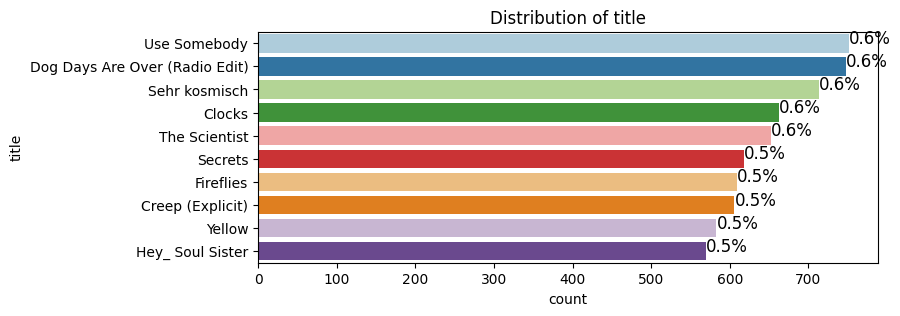

In [34]:
bar_perc(data = df_final, feature = 'title', top = 10, rotate_axis=True, figsize=(8,3), add_others=False)

Most interacted users

In [35]:
# Calculate the users with more interactions
top_10_users = df_final['user_id'].value_counts().head(10)

# Display the songs
print(top_10_users)

# Print sum of number interactions:
print('')
print('Total number of interactions from those users: ',top_10_users.sum())

user_id
ce5c912bb8044f23fc0fc31bd986b8d0a7303db5    243
34e191b5e3ac4d0b86b100e3325aa46c34998248    227
7c80116b2a5c6602ca60fc40ef932e12fd304a69    202
2078b23380f2a80615fb9829621f7dc6cc6c7a82    184
4e3398ef89d9c00975d0b0f5b7bc7b7f067c7902    177
249ae19e39f6a2caa3d17ce90e028d04555a67aa    176
5937a938ba5286734c485e9519eed947225dc672    175
1ee591a388274035a4fd8a4ae40a9589d320bb9d    175
90141787198af4e517162e40a6231a5f3cdb03ea    174
ddaa3a5eb4e7fd644e76b6c5159084a6fdbe6213    171
Name: count, dtype: int64

Total number of interactions from those users:  1904


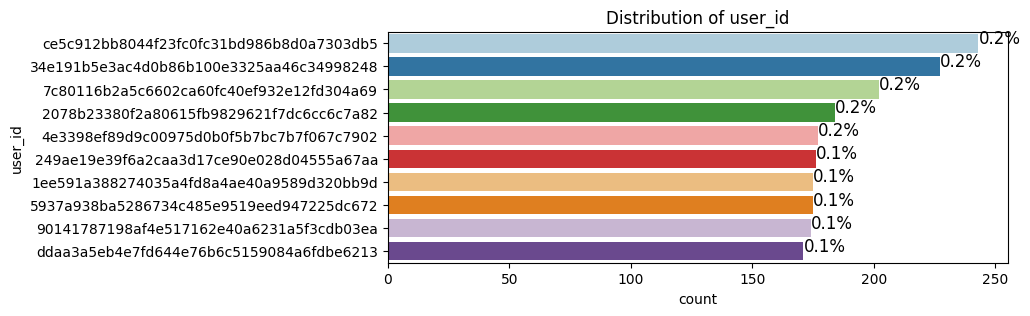

In [36]:
bar_perc(data = df_final, feature = 'user_id', top = 10, rotate_axis=True, figsize=(8,3), add_others=False)

In [37]:
# What does the user with the highest number of listened songs listen to?
user_listened_detail = df_final.loc[df_final['user_id'] == 'ce5c912bb8044f23fc0fc31bd986b8d0a7303db5',].groupby(['title','artist_name']).agg(
    play_count = ('play_count', 'sum')
).reset_index()
user_listened_detail.sort_values(by = 'play_count', ascending = False).head(10)

,title,artist_name,play_count
14149,Don't Leave Me,The All-American Rejects,5
40409,My Paper Heart,The All-American Rejects,5
21954,Halo,The Pussycat Dolls,5
49591,S.O.S.,Jonas Brothers,4
71686,You And Me Jesus,Jake Hess,4
36384,Magic,The Pussycat Dolls,4
8476,Brothers & Sisters,Coldplay,4
31143,Just Dance,Lady GaGa / Colby O'Donis,3
45581,Party In The U.S.A.,Miley Cyrus,3
61516,The Scientist,Coldplay,3


#### Most interacted artists

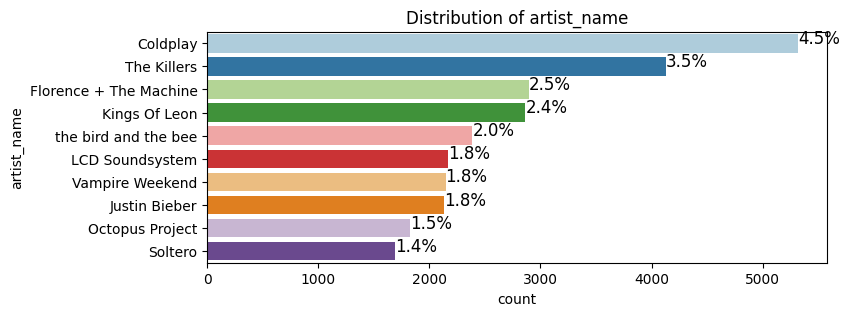

In [38]:
bar_perc(data = df_final, feature = 'artist_name', top = 10, rotate_axis=True, figsize=(8,3), add_others=False)

In [39]:
# What where the artists with more play counts by users?
artists_listened_detail = df_final.groupby(['artist_name']).agg(
    play_count_sum = ('play_count', 'sum'),
    play_count_avg = ('play_count', 'mean')
).reset_index()

# Order by average
artists_listened_detail.sort_values(by = 'play_count_avg', ascending = False).head(10)

,artist_name,play_count_sum,play_count_avg
146,Old 97's,361,3.373832
198,The Prodigy,252,2.625000
41,Colossal,263,2.578431
211,Three Drives,373,2.486667
227,White Denim,248,2.296296
189,The Buggles,275,2.235772
85,Harmonia,1583,2.220196
181,Southside Spinners,335,2.218543
57,Dwight Yoakam,827,2.217158
184,Tavares,214,2.206186


In [40]:
# Order by sum
artists_listened_detail.sort_values(by = 'play_count_sum', ascending = False).head(10)

,artist_name,play_count_sum,play_count_avg
40,Coldplay,9049,1.701900
192,The Killers,6152,1.490310
73,Florence + The Machine,5422,1.872238
113,Kings Of Leon,4855,1.695182
103,Justin Bieber,3496,1.641315
231,the bird and the bee,3479,1.457478
225,Vampire Weekend,3332,1.553380
114,LCD Soundsystem,3283,1.514299
145,Octopus Project,2881,1.578630
160,Radiohead,2753,1.657435


#### Observations:
* 6,512 out of 117,876 interactions (5.5%) involve the 10 songs with the most interactions.
* 1,904 out of 117,876 interactions (1.6%) involve the 10 users with the most interactions.
* There are **3 Coldplay songs** among the 10 songs with the most interactions. This suggests that Coldplay is one of the bands with the greatest reach among users.
* The user with the most interactions has 3 songs by the band The All-American Rejects in their top 10 most played songs, which suggests they really like that band.
* Coldplay and The Killers are the two artists with more number of interactions. However, the average number of plays per song is less than two, which suggests that although the artist reaches a larger number of users, those users don’t tend to listen to the same songs from that artist multiple times.
* Old 97's is the artist with the highest average play count per song (3.37 times), although they were only listened to by 361 users.



Songs released on yearly basis

In [41]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column
resume = song_df.groupby(['year']).count().reset_index()
resume

,year,song_id,title,release,artist_name,year_missing,year_release,year_artist,year_replaced
0,0,484404,484404,484404,484404,484404,484404,484404,484404
1,1922,6,6,6,6,6,6,6,6
2,1924,5,5,5,5,5,3,5,5
3,1925,7,7,7,7,7,7,7,7
4,1926,19,19,19,19,19,15,19,19
...,...,...,...,...,...,...,...,...,...
85,2007,39414,39414,39414,39414,39414,11506,27817,39414
86,2008,34770,34770,34770,34770,34770,10349,23257,34770
87,2009,31051,31051,31051,31051,31051,8694,20350,31051
88,2010,9397,9397,9397,9397,9397,2343,6250,9397


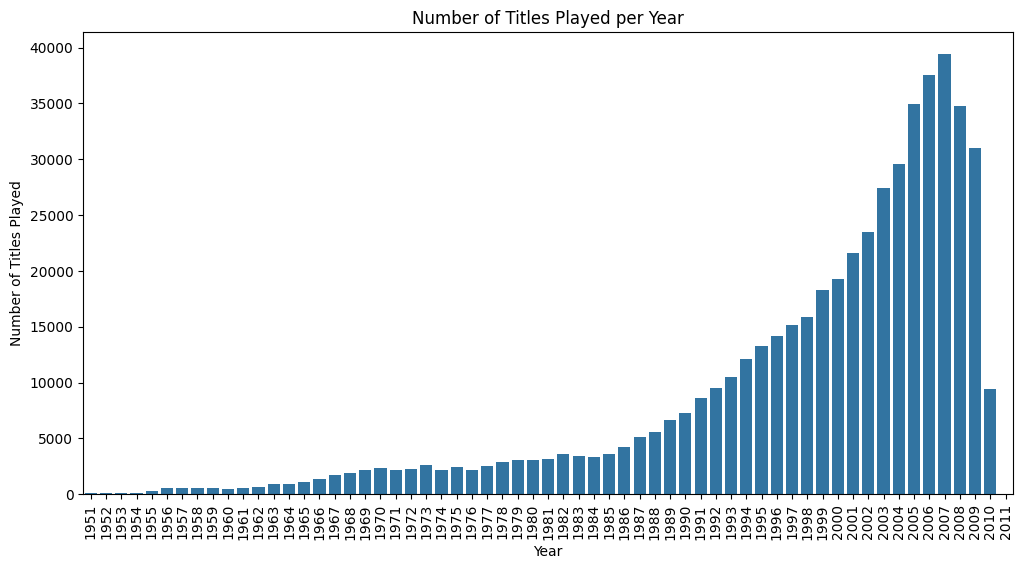

In [42]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a barplot plot with y label as "number of titles played" and x -axis year
sns.barplot(data=resume.loc[resume['year'] > 1950,], x='year', y='title')

# Set the x label of the plot
plt.xlabel("Year")

# Set the y label of the plot
plt.ylabel("Number of Titles Played")
plt.title("Number of Titles Played per Year")
plt.xticks(rotation=90)

# Show the plot
plt.show()

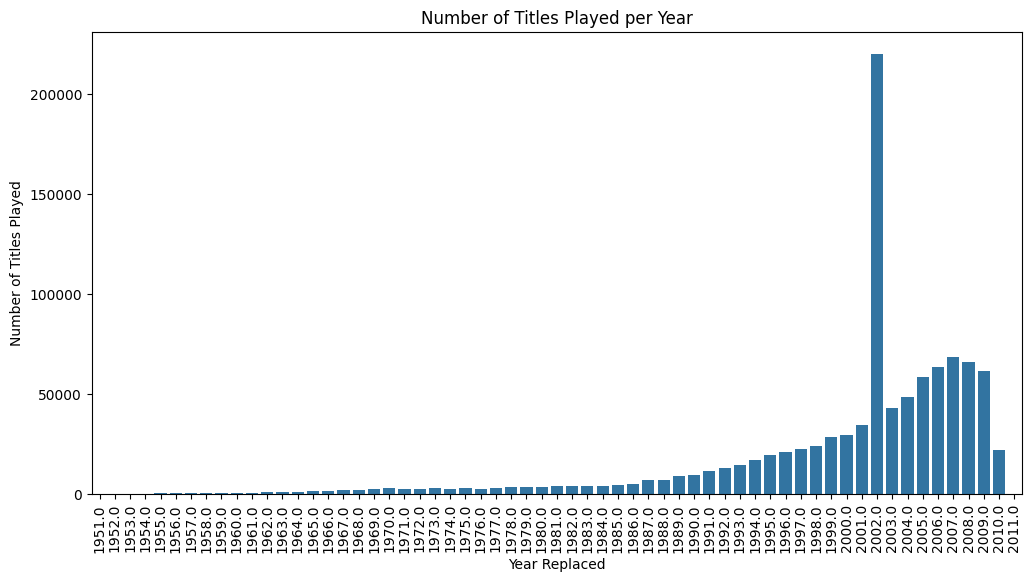

In [43]:
# With replaced year
resume_2 = song_df.groupby(['year_replaced']).count().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a barplot plot with y label as "number of titles played" and x -axis year
sns.barplot(data=resume_2.loc[resume_2['year_replaced'] > 1950,], x='year_replaced', y='title')

# Set the x label of the plot
plt.xlabel("Year Replaced")

# Set the y label of the plot
plt.ylabel("Number of Titles Played")
plt.title("Number of Titles Played per Year")
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### **Observations and Insights:** #
* Most of the songs that include the release year are from after 1990. There was a peak in the number of songs released between 2005 and 2009.
* By analyzing the year_replaced field, we can see a peak in songs with the assigned year = 2002, since it is the median year of the sample. However, the overall trend—aside from this peak—is the same as the one observed in the year field before replacing the zeros.

**Think About It:** What other insights can be drawn using exploratory data analysis?

#### Play count distribution

In [44]:
count_df.head()

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


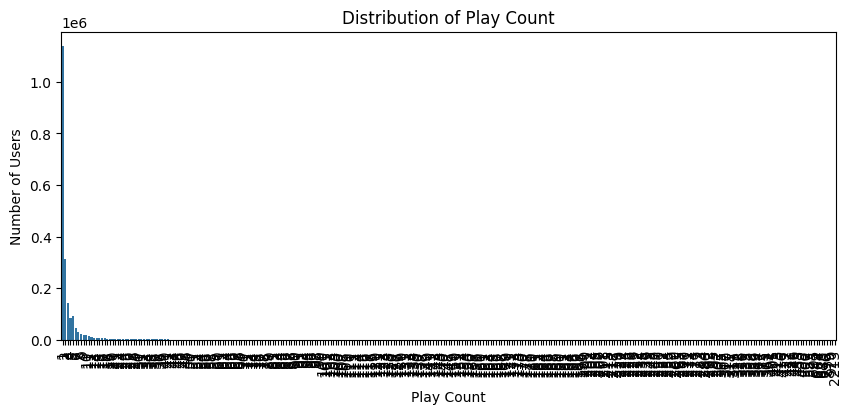

In [45]:
# Created resume table
resume_playcount = count_df.groupby(['play_count']).count().reset_index()

# Set the figure size
plt.figure(figsize=(10, 4))

# Create a barplot plot
sns.barplot(data=resume_playcount, x='play_count', y='user_id')

# Set the x label of the plot
plt.xlabel("Play Count")

# Set the y label of the plot
plt.ylabel("Number of Users")
plt.title("Distribution of Play Count")
plt.xticks(rotation=90)

# Show the plot
plt.show()

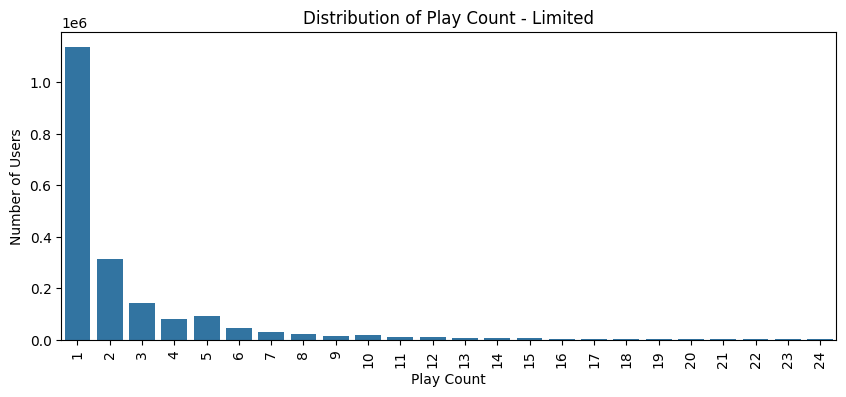

In [46]:
# Created resume table
resume_playcount = count_df.groupby(['play_count']).count().reset_index()

# Set the figure size
plt.figure(figsize=(10, 4))

# Create a barplot plot
sns.barplot(data=resume_playcount.loc[resume_playcount['play_count']<25], x='play_count', y='user_id')

# Set the x label of the plot
plt.xlabel("Play Count")

# Set the y label of the plot
plt.ylabel("Number of Users")
plt.title("Distribution of Play Count - Limited")
plt.xticks(rotation=90)

# Show the plot
plt.show()

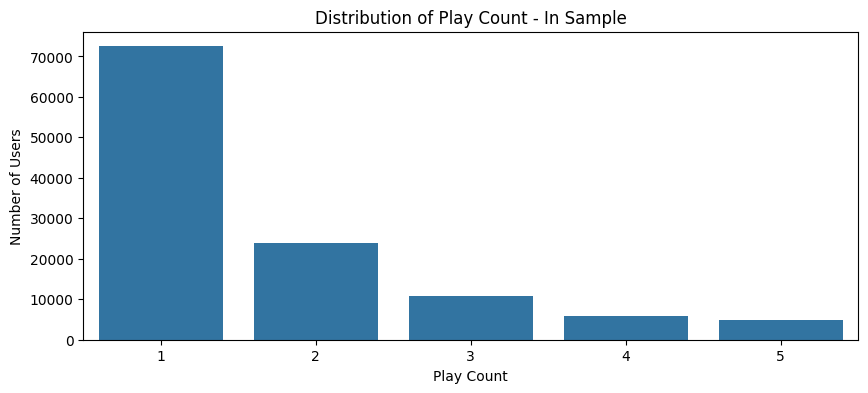

In [47]:
# Created resume table
resume_playcount = df_final.groupby(['play_count']).count().reset_index()

# Set the figure size
plt.figure(figsize=(10, 4))

# Create a barplot plot
sns.barplot(data=resume_playcount.loc[resume_playcount['play_count']<25], x='play_count', y='user_id')

# Set the x label of the plot
plt.xlabel("Play Count")

# Set the y label of the plot
plt.ylabel("Number of Users")
plt.title("Distribution of Play Count - In Sample")

# Show the plot
plt.show()

In [48]:
# Summary Statitics in the sample
summary_play_count_sample = df_final['play_count'].describe()

# Summary Statitics in the original data
summary_play_count_original = count_df['play_count'].describe()

# Convert both to DataFrames
summary_df = pd.DataFrame({
    'sample': summary_play_count_sample,
    'original': summary_play_count_original
})

# Print results
print('Summary Statitics in the sample vs in the original data')
print('')

# Disable scientific notation for better readability of numerical outputs
pd.set_option('display.float_format', '{:,.2f}'.format)
print(summary_df)

Summary Statitics in the sample vs in the original data

          sample     original
count 117,876.00 2,000,000.00
mean        1.70         3.05
std         1.09         6.58
min         1.00         1.00
25%         1.00         1.00
50%         1.00         1.00
75%         2.00         3.00
max         5.00     2,213.00


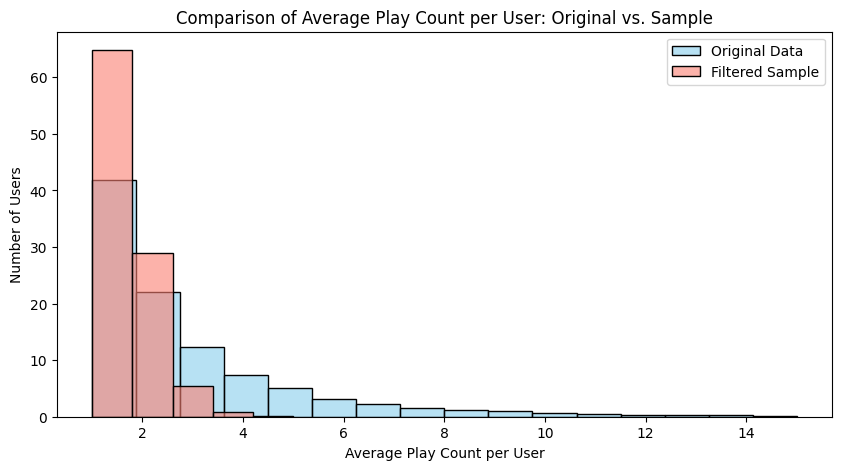

In [49]:
# Average Play Count by User
# Create summary tables with average play count per user
resume_playcount_byuser = count_df.groupby(['user_id']).agg(
    play_count_avg=('play_count', 'mean')
).reset_index()

resume_playcount_byuser_final = df_final.groupby(['user_id']).agg(
    play_count_avg=('play_count', 'mean')
).reset_index()

# Set the figure size
plt.figure(figsize=(10, 5))

# Plot both histograms in the same figure
sns.histplot(data=resume_playcount_byuser.loc[resume_playcount_byuser['play_count_avg']<=15],
             x='play_count_avg', bins=16, color='skyblue', label='Original Data', alpha=0.6,
             stat="percent")
sns.histplot(data=resume_playcount_byuser_final,
             x='play_count_avg', bins=5, color='salmon', label='Filtered Sample', alpha=0.6,
             stat="percent")

# Add labels and title
plt.xlabel("Average Play Count per User")
plt.ylabel("Number of Users")
plt.title("Comparison of Average Play Count per User: Original vs. Sample")
plt.legend()

# Show plot
plt.show()

In [50]:
# Summary Statitics in the sample
summary_play_count_sample = resume_playcount_byuser_final['play_count_avg'].describe()

# Summary Statitics in the original data
summary_play_count_original = resume_playcount_byuser['play_count_avg'].describe()

# Convert both to DataFrames
summary_df = pd.DataFrame({
    'sample': summary_play_count_sample,
    'original': summary_play_count_original
})

# Print results
print('Average of Play Count By User:')
print('Summary Statitics in the sample vs in the original data')
print('')

# Disable scientific notation for better readability of numerical outputs
pd.set_option('display.float_format', '{:,.2f}'.format)
print(summary_df)

Average of Play Count By User:
Summary Statitics in the sample vs in the original data

        sample  original
count 3,155.00 76,353.00
mean      1.72      3.20
std       0.50      3.69
min       1.00      1.00
25%       1.38      1.42
50%       1.61      2.17
75%       1.97      3.62
max       5.00    192.00


#### Observations:
* In count_df, there are very few users who played a single song many times, which distorts the visualization (it's striking that there's a song that was played 2,219 times by the same user!).
* By analyzing only the songs that were played fewer than 25 times per user, we observe that most songs are listened to just once or twice by each user. The same pattern is seen in the selected modeling sample (df_final), where most songs are also played only once or twice per user.

* When comparing the descriptive statistics of the play_count variable in the original dataset and the modeling sample, we can see that the measures of central tendency remain fairly similar:

  - First quartile and median = 1 (in both samples, at least 50% of the songs were played only once per user at most)

  - Third quartile = 2 in the modeling sample, but = 3 in the original sample. This could indicate a slight shift in the composition of the modeling dataset.

* Analyzing the average number of plays per user, we observe some changes in the distribution between the development sample and the original dataset.
In the development sample, the average play counts per user are more concentrated around lower values, while in the original dataset, the distribution spreads more toward higher values (there are users who apparently listen to the same song more times).

* Looking at the descriptive statistics of both samples, we see that the **3,155 users selected for the development sample** listen to each song an average of **1.72 times**, with a median of 1.6 (meaning at least 50% of users listen to each song 1.6 times on average).
* However, the **76,353 users in the original dataset** listen to each song an average of **3.20 times** (almost double the development sample), and at least 50% of users listen to each song 2.17 times on average.

* This should be taken into account when implementing the model in the real user base, as the development sample may not fully represent the behavior of the majority of users. This is an important point to consider when designing recommendation strategies for users who tend to listen to the same song multiple times.

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [51]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_play_count = df_final.groupby(['song_id'])['play_count'].mean()

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
count_play_count = df_final.groupby('song_id')['play_count'].count()


In [52]:
# Making a dataframe with the average_count and play_freq
final_play_count = pd.DataFrame({'avg_play_count': average_play_count, 'play_count_count': count_play_count})

# Let us see the first five records of the final_play dataset
final_play_count = final_play_count.sort_values(by = 'avg_play_count', ascending=False)
final_play_count.head(5)

,avg_play_count,play_count_count
song_id,,
SOSJSSU12A6D4F8F41,3.37,107
SOVIZNF12AF72A710A,2.62,96
SOQGSUC12A8C13B66D,2.58,102
SOZVVRE12A8C143150,2.49,150
SONYKOW12AB01849C9,2.31,618


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [53]:
# Build the function to find top n songs
def top_n_songs(data, n, min_interaction = 100):

    # Finding songs with minimum number of interactions
    recommendations = data[data['play_count_count'] > min_interaction]

    # Sorting values with respect to average play count
    recommendations = recommendations.sort_values(by = 'avg_play_count', ascending = False)

    return recommendations.index[:n]

In [54]:
# Recommend top 10 songs using the function defined above
# Get the list of top song IDs
top_songs = list(top_n_songs(final_play_count, n = 10, min_interaction = 50))

# Filter the song_df to include only the songs in the top_songs list
top_songs_info = song_df[song_df['song_id'].isin(top_songs)][['song_id', 'title', 'artist_name']]

# Reorder the filtered DataFrame to match the order of song_ids in top_songs
top_songs_info = top_songs_info.set_index('song_id').loc[top_songs].reset_index()

# Display the result
print(top_songs_info)

              song_id                        title         artist_name
0  SOSJSSU12A6D4F8F41        Victoria (LP Version)            Old 97's
1  SOVIZNF12AF72A710A              The Big Gundown         The Prodigy
2  SOQGSUC12A8C13B66D           Brave The Elements            Colossal
3  SOZVVRE12A8C143150                  Greece 2000        Three Drives
4  SONYKOW12AB01849C9                      Secrets         OneRepublic
5  SOOGNOZ12AAF3B2936                 Transparency         White Denim
6  SOVWBYM12A6D4F8A22  Video Killed The Radio Star         The Buggles
7  SOFRQTD12A81C233C0                Sehr kosmisch            Harmonia
8  SOBRHVR12A8C133F35                    Luvstruck  Southside Spinners
9  SOBONKR12A58A7A7E0               You're The One       Dwight Yoakam


### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [55]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
#!pip install surprise

In [56]:
#!pip install "numpy<2"

In [57]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [58]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [59]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale = (0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)


**Think About It:** How changing the test size would change the results and outputs?

In [60]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**
- **RMSE** measures how far the predicted play count are from the actual play count. A lower RMSE indicates better prediction accuracy. The RMSE of the baseline model is **1.0878**.
- **Recall (~0.69)** means that 69% of the relevant songs were correctly recommended.
- **Precision (~0.39)** indicates that 39% of the recommended songs were actually relevant.
- **F1-score (~0.50)** indicates that the model achieves a moderate balance between precision and recall, suggesting that while the predictions are somewhat accurate, there is still room for improvement in capturing both relevant and correctly predicted instances.

In [61]:
# Choose a sample user
sample_user = df_final[['user_id','song_id','play_count']].loc[(df_final['user_encoded'] == 6958) & (df_final['song_encoded'] == 1671)]
sample_user

,user_id,song_id,play_count
224,17aa9f6dbdf753831da8f38c71b66b64373de613,SOEGZHD12A8C13BF3D,2


In [62]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user.predict(sample_user['user_id'].iloc[0], sample_user['song_id'].iloc[0], r_ui = sample_user['play_count'].iloc[0], verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOEGZHD12A8C13BF3D r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOEGZHD12A8C13BF3D', r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [63]:
# Choose a sample user
songs_excluded = df_final['song_id'].loc[df_final['user_id'] == '17aa9f6dbdf753831da8f38c71b66b64373de613']
songs_possibles = df_final['song_id']
songs_filtered = songs_possibles[~songs_possibles.isin(songs_excluded)]
songs_filtered.head()

,song_id
364,SOAFTRR12AF72A8D4D
365,SOAIILB12A58A776F7
366,SOAJJDS12A8C13A3FB
389,SOBTNNG12AF72A73E8
391,SOBZCTQ12AB0183220


In [64]:
# Created a list with the selection of user_id and song_id
sample_user_withoutsong = ['17aa9f6dbdf753831da8f38c71b66b64373de613','SOYQQAC12A6D4FD59E']

In [65]:
# Example
df_final.loc[(df_final['user_id'] == sample_user_withoutsong[0]) & (df_final['song_id'] == sample_user_withoutsong[1])]

,user_id,song_id,play_count,title,release,artist_name,year,year_replaced,user_encoded,song_encoded


In [66]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
sim_user_user.predict(sample_user_withoutsong[0], sample_user_withoutsong[1], verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOYQQAC12A6D4FD59E r_ui = None   est = 1.56   {'actual_k': 36, 'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOYQQAC12A6D4FD59E', r_ui=None, est=1.557152380679533, details={'actual_k': 36, 'was_impossible': False})

**Observations and Insights:**

**User ID:** 17aa9f6dbdf753831da8f38c71b66b64373de613
**Song ID:** SOEGZHD12A8C13BF3D

The output above shows that the predicted play count is quite close to the actual play count for this user-item pair using the user-user similarity-based baseline model (2 actual vs. 1.80 predicted). This suggests that the model is capturing the user's preferences with reasonable accuracy.


**User ID:** 17aa9f6dbdf753831da8f38c71b66b64373de613
**Song ID:** SOYQQAC12A6D4FD59E

This user has never played this song, so we cannot know how close the prediction is to the actual value. However, we can start comparing the results with those from other models.

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30, 40, 50, 60], 'min_k': [3, 6, 9, 12],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


In [67]:
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 60, min_k = 12, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0582
Precision:  0.415
Recall:  0.637
F_1 score:  0.503


#### Observations:
* The metrics obtained from the model after hyperparameter tuning are quite similar, so there are no significant changes in the model's performance after the tuning process.

In [68]:
# Sample user data
sample_user

,user_id,song_id,play_count
224,17aa9f6dbdf753831da8f38c71b66b64373de613,SOEGZHD12A8C13BF3D,2


In [69]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(sample_user['user_id'].iloc[0], sample_user['song_id'].iloc[0], r_ui = sample_user['play_count'].iloc[0], verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOEGZHD12A8C13BF3D r_ui = 2.00   est = 1.52   {'actual_k': 60, 'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOEGZHD12A8C13BF3D', r_ui=2, est=1.5165178043298226, details={'actual_k': 60, 'was_impossible': False})

In [70]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(sample_user_withoutsong[0], sample_user_withoutsong[1], verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOYQQAC12A6D4FD59E r_ui = None   est = 1.62   {'actual_k': 36, 'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOYQQAC12A6D4FD59E', r_ui=None, est=1.61857898767935, details={'actual_k': 36, 'was_impossible': False})

Observations and Insights:

**User ID:** 17aa9f6dbdf753831da8f38c71b66b64373de613

**Song ID:** SOEGZHD12A8C13BF3D


The estimated play count for this user after hyperparameter tuning is farther from the actual value compared to the previous model (1.52 vs. 1.80 vs. 2 actual).

**User ID:** 17aa9f6dbdf753831da8f38c71b66b64373de613

**Song ID:** SOYQQAC12A6D4FD59E

The play count estimation for this song is very similar with both models for this user (1.62 vs 1.56).

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [71]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, k = 5)

[31, 82, 90, 116, 125]

In [72]:
# Who are this users?
neighbors = sim_user_user_optimized.get_neighbors(0, k = 5)
print('Real User with Internal ID = 0: ', trainset.to_raw_uid(0))
print('')
neighbors_real = [trainset.to_raw_uid(0)]
print('Neighbors')
for i in neighbors:
  neighbors_real.append(trainset.to_raw_uid(i))
  print(i, trainset.to_raw_uid(i))

Real User with Internal ID = 0:  d8aace9308e530e0f1ef2a85258b62f8245be423

Neighbors
31 1b94c69fc145d531ac22466cf3848175fd1d1742
82 7f4e00f67899a3499ab0e53615173fa31690849f
90 be21ec120193effd2a5e545c4bafa2e1f92e9816
116 d7e0c654aba6a33d543779db21f086b7410e7996
125 0c737221795bd807e102d7117c6fab48adc7aa66


Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [73]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not played yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the users for those non played song ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted play_counts
        recommendations.append((item_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted play_count songs for this user

In [74]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, sample_user['user_id'].iloc[0], 5, sim_user_user_optimized)
recommendations

[('SOSJSSU12A6D4F8F41', 2.9352354645501686),
 ('SOQGSUC12A8C13B66D', 2.6687197801836477),
 ('SOVIZNF12AF72A710A', 2.467204888613006),
 ('SOQGOPT12AAF3B2B27', 2.3860823787498866),
 ('SOMDVSL12A6D4F7230', 2.348858948867852)]

In [75]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
top_recommendations = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

# Get information for this songs
top_recommendations.merge(song_df[['song_id', 'title', 'artist_name']], on='song_id', how='left')

,song_id,predicted_play_count,title,artist_name
0,SOSJSSU12A6D4F8F41,2.94,Victoria (LP Version),Old 97's
1,SOQGSUC12A8C13B66D,2.67,Brave The Elements,Colossal
2,SOVIZNF12AF72A710A,2.47,The Big Gundown,The Prodigy
3,SOQGOPT12AAF3B2B27,2.39,Wild World,Cat Stevens
4,SOMDVSL12A6D4F7230,2.35,Heaven Must Be Missing An Angel,Tavares


**Observations and Insights:**

* All the predicted play counts in the recommendations exceed 2 times.

### Correcting the play_counts and Ranking the above songs

In [76]:
def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts
  ranked_songs = final_play_count.loc[[items[0] for items in recommendations]].sort_values('play_count_count', ascending = False)[['play_count_count']].reset_index()

  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_counts'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_count_count'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_counts', ascending = False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [77]:
# Applying the ranking_songs function on the final_play data
recommendations_sim_user_user_optimized = ranking_songs(recommendations, final_play_count)

# Get information for this songs
recommendations_sim_user_user_optimized.merge(song_df[['song_id', 'title', 'artist_name']], on='song_id', how='left')


,song_id,play_count_count,predicted_play_count,corrected_play_counts,title,artist_name
0,SOSJSSU12A6D4F8F41,107,2.94,2.84,Victoria (LP Version),Old 97's
1,SOQGSUC12A8C13B66D,102,2.67,2.57,Brave The Elements,Colossal
2,SOVIZNF12AF72A710A,96,2.47,2.37,The Big Gundown,The Prodigy
3,SOQGOPT12AAF3B2B27,109,2.39,2.29,Wild World,Cat Stevens
4,SOMDVSL12A6D4F7230,97,2.35,2.25,Heaven Must Be Missing An Angel,Tavares


**Observations and Insights:**
* When applying the correction that depends on the number of observations per song, to penalize predictions based on songs with very few ratings, the order of the recommendations is the same.

### Item Item Similarity-based collaborative filtering recommendation systems

In [78]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items. Use random_state=1
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**
* The RMSE of the baseline item-based model is slightly lower than the RMSE of the baseline user-based model (1.04 vs 1.09).
* The F_1 Score of the baseline item-based model is slightly lower than the F_1 Score of the baseline user-based model (0.40 vs 0.50).
* The item-based model makes more accurate predictions in numerical terms, but the user-based model is slightly better at recommending relevant products.

In [79]:
# Data of sample user
sample_user

,user_id,song_id,play_count
224,17aa9f6dbdf753831da8f38c71b66b64373de613,SOEGZHD12A8C13BF3D,2


In [80]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
sim_item_item.predict(sample_user['user_id'].iloc[0], sample_user['song_id'].iloc[0], r_ui = sample_user['play_count'].iloc[0], verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOEGZHD12A8C13BF3D r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOEGZHD12A8C13BF3D', r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [81]:
users_excluded = df_final['user_id'].loc[df_final['song_encoded'] == 1671]
users_possibles = df_final['user_id']
users_filtered = users_possibles[~users_possibles.isin(users_excluded)]
users_filtered.head(1)

,user_id
364,5a905f000fc1ff3df7ca807d57edb608863db05d


In [82]:
df_final.loc[(df_final['user_id'] == '5a905f000fc1ff3df7ca807d57edb608863db05d') & (df_final['song_id'] == 'SOEGZHD12A8C13BF3D')]

,user_id,song_id,play_count,title,release,artist_name,year,year_replaced,user_encoded,song_encoded


In [83]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict('5a905f000fc1ff3df7ca807d57edb608863db05d', 'SOEGZHD12A8C13BF3D', verbose = True)

user: 5a905f000fc1ff3df7ca807d57edb608863db05d item: SOEGZHD12A8C13BF3D r_ui = None   est = 2.55   {'actual_k': 40, 'was_impossible': False}


Prediction(uid='5a905f000fc1ff3df7ca807d57edb608863db05d', iid='SOEGZHD12A8C13BF3D', r_ui=None, est=2.5507234733908, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

**User ID:** 17aa9f6dbdf753831da8f38c71b66b64373de613

**Song ID:** SOEGZHD12A8C13BF3D

The estimated play count with the item-based model for this user and this song is the farthest from the actual play count, even more so than with the optimized user-based model.

  - actual play count: 2
  - baseline user-based model play count: 1.80
  - optimized user-based model play count: 1.52
  - baseline item-based model play count: 1.37

**User ID:** 5a905f000fc1ff3df7ca807d57edb608863db05d

**Song ID:** SOEGZHD12A8C13BF3D

The estimated play count with the item-based model for this user and this song is 2.55.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [84]:
# Apply the best model found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'cosine',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0398
Precision:  0.325
Recall:  0.587
F_1 score:  0.418


**Observations and Insights:**
The metrics obtained from the model after hyperparameter tuning are quite similar, so there are no significant changes in the model's performance after the tuning process.

In [85]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(sample_user['user_id'].iloc[0], sample_user['song_id'].iloc[0], r_ui = sample_user['play_count'].iloc[0], verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOEGZHD12A8C13BF3D r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOEGZHD12A8C13BF3D', r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [86]:
# Search the song_id
df_final['song_id'].loc[df_final['song_encoded'] == 3232].unique()

array(['SOICNON12A8C140437'], dtype=object)

In [87]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
sim_item_item_optimized.predict('17aa9f6dbdf753831da8f38c71b66b64373de613', 'SOICNON12A8C140437', verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOICNON12A8C140437 r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOICNON12A8C140437', r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**

**User ID:** 17aa9f6dbdf753831da8f38c71b66b64373de613

**Song ID:** SOEGZHD12A8C13BF3D

The estimated play count with the item-based model for this user and this song is the farthest from the actual play count, even more so than with the previuos model.

  - actual play count: 2
  - baseline user-based model play count: 1.80
  - optimized user-based model play count: 1.52
  - baseline item-based model play count: 1.37
  - optimized item-based model play count: 1.36

**User ID:** 17aa9f6dbdf753831da8f38c71b66b64373de613

**Song ID:** SOICNON12A8C140437

The estimated play count with the item-based model for this user and this song is 1.38, very simmilar to the other song (SOEGZHD12A8C13BF3D).

In [88]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[3, 10, 11, 24, 30]

In [89]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, '17aa9f6dbdf753831da8f38c71b66b64373de613', 5, sim_item_item_optimized)
recommendations

[('SOHEMBB12A6701E907', 1.6500104288622537),
 ('SOUGCDK12AC95F075F', 1.5423487740210162),
 ('SOEMUXL12A58A7B848', 1.5406750151127577),
 ('SOLRDEI12A8C13AAA2', 1.539256633497827),
 ('SONQSBF12AF72ABB86', 1.5388658162433617)]

In [90]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
top_recommendations = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

# Get information for this songs
top_recommendations.merge(song_df[['song_id', 'title', 'artist_name']], on='song_id', how='left')

,song_id,predicted_play_count,title,artist_name
0,SOHEMBB12A6701E907,1.65,Superman,Eminem / Dina Rae
1,SOUGCDK12AC95F075F,1.54,Never Let You Go,Justin Bieber
2,SOEMUXL12A58A7B848,1.54,Rehab,Rihanna
3,SOLRDEI12A8C13AAA2,1.54,Ms. Jackson,OutKast
4,SONQSBF12AF72ABB86,1.54,Thrills,LCD Soundsystem


In [91]:
# Applying the ranking_songs function
recommendations_sim_item_item_optimized = ranking_songs(recommendations, final_play_count)

# Get information for this songs
recommendations_sim_item_item_optimized.merge(song_df[['song_id', 'title', 'artist_name']], on='song_id', how='left')


,song_id,play_count_count,predicted_play_count,corrected_play_counts,title,artist_name
0,SOHEMBB12A6701E907,232,1.65,1.58,Superman,Eminem / Dina Rae
1,SOUGCDK12AC95F075F,220,1.54,1.47,Never Let You Go,Justin Bieber
2,SONQSBF12AF72ABB86,135,1.54,1.45,Thrills,LCD Soundsystem
3,SOLRDEI12A8C13AAA2,120,1.54,1.45,Ms. Jackson,OutKast
4,SOEMUXL12A58A7B848,112,1.54,1.45,Rehab,Rihanna


**Observations and Insights:**

The recommendations made by the optimized item-item model have significantly lower estimated play counts than those of the optimized user-user model (all below 2), and they are completely different.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [92]:
# Build baseline model using svd
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state = 1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [93]:
# Display information for the user sample
sample_user

,user_id,song_id,play_count
224,17aa9f6dbdf753831da8f38c71b66b64373de613,SOEGZHD12A8C13BF3D,2


In [94]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(sample_user['user_id'].iloc[0], sample_user['song_id'].iloc[0], r_ui = sample_user['play_count'].iloc[0], verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOEGZHD12A8C13BF3D r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOEGZHD12A8C13BF3D', r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [95]:
users_excluded = df_final['user_id'].loc[df_final['song_encoded'] == 3232]
users_possibles = df_final['user_id']
users_filtered = users_possibles[~users_possibles.isin(users_excluded)]
users_filtered.head(1)

,user_id
209,17aa9f6dbdf753831da8f38c71b66b64373de613


In [96]:
df_final['song_id'].loc[df_final['song_encoded']==3232].unique()

array(['SOICNON12A8C140437'], dtype=object)

In [97]:
df_final.loc[(df_final['user_id'] == '17aa9f6dbdf753831da8f38c71b66b64373de6130') & (df_final['song_id'] == 'SOICNON12A8C140437')]

,user_id,song_id,play_count,title,release,artist_name,year,year_replaced,user_encoded,song_encoded


In [98]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict('17aa9f6dbdf753831da8f38c71b66b64373de613', 'SOICNON12A8C140437', verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOICNON12A8C140437 r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOICNON12A8C140437', r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30, 40], 'lr_all': [0.001, 0.005, 0.01, 0.015],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [99]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 40, lr_all = 0.015, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0080
Precision:  0.414
Recall:  0.629
F_1 score:  0.499


**Observations and Insights:**

* The metrics of this model are similar to the other models. However, the RMSE is one of the lowest.

**User ID:** 17aa9f6dbdf753831da8f38c71b66b64373de613

**Song ID:** SOEGZHD12A8C13BF3D

The estimated play count with the svd based model for this user and this song is the farthest from the actual play count, even more so than with the previuos model.

  - actual play count: 2
  - baseline user-based model play count: 1.80
  - optimized user-based model play count: 1.52
  - baseline item-based model play count: 1.37
  - optimized item-based model play count: 1.36
  - baseline svd model play count: 1.27

In [100]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(sample_user['user_id'].iloc[0], sample_user['song_id'].iloc[0], r_ui = sample_user['play_count'].iloc[0], verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOEGZHD12A8C13BF3D r_ui = 2.00   est = 1.42   {'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOEGZHD12A8C13BF3D', r_ui=2, est=1.41851790510371, details={'was_impossible': False})

In [101]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_optimized.predict('17aa9f6dbdf753831da8f38c71b66b64373de6130', 'SOICNON12A8C140437', verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de6130 item: SOICNON12A8C140437 r_ui = None   est = 1.66   {'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de6130', iid='SOICNON12A8C140437', r_ui=None, est=1.664902843811836, details={'was_impossible': False})

**Observations and Insights:**

**User ID:** 17aa9f6dbdf753831da8f38c71b66b64373de613

**Song ID:** SOEGZHD12A8C13BF3D

The estimated play count with the svd based model optimizated for this user and this song is closer from the actual play count, but it is not the closest estimated.

  - actual play count: 2
  - baseline user-based model play count: 1.80
  - optimized user-based model play count: 1.52
  - baseline item-based model play count: 1.37
  - optimized item-based model play count: 1.36
  - baseline svd model play count: 1.27
  - optimized svd model play count: 1.42

In [102]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, '17aa9f6dbdf753831da8f38c71b66b64373de613', 5, svd_optimized)
recommendations

[('SOSJSSU12A6D4F8F41', 2.4040098372560044),
 ('SOOGNOZ12AAF3B2936', 2.080574413333296),
 ('SOZVVRE12A8C143150', 1.9587792330724658),
 ('SOBRHVR12A8C133F35', 1.9415628420718385),
 ('SOVIZNF12AF72A710A', 1.9100250876802596)]

In [103]:
# Ranking songs based on above recommendations
recommendations_svd_optimized = ranking_songs(recommendations, final_play_count)

# Get information for this songs
recommendations_svd_optimized.merge(song_df[['song_id', 'title', 'artist_name']], on='song_id', how='left')

,song_id,play_count_count,predicted_play_count,corrected_play_counts,title,artist_name
0,SOSJSSU12A6D4F8F41,107,2.40,2.31,Victoria (LP Version),Old 97's
1,SOOGNOZ12AAF3B2936,108,2.08,1.98,Transparency,White Denim
2,SOZVVRE12A8C143150,150,1.96,1.88,Greece 2000,Three Drives
3,SOBRHVR12A8C133F35,151,1.94,1.86,Luvstruck,Southside Spinners
4,SOVIZNF12AF72A710A,96,1.91,1.81,The Big Gundown,The Prodigy


**Observations and Insights:**
* The top recommendation from this model is the same as the top recommendation from the user-based model, and it has an estimated play count greater than 2. Since two different models made the same 'top' recommendation, this song could be a strong candidate to be recommended to this user.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [104]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [105]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(sample_user['user_id'].iloc[0], sample_user['song_id'].iloc[0], r_ui = sample_user['play_count'].iloc[0], verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOEGZHD12A8C13BF3D r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOEGZHD12A8C13BF3D', r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [106]:
df_final.loc[(df_final['user_encoded'] == 6958) & (df_final['song_encoded'] == 3232)]

,user_id,song_id,play_count,title,release,artist_name,year,year_replaced,user_encoded,song_encoded


In [107]:
df_final['song_id'].loc[df_final['song_encoded'] == 3232].unique()

array(['SOICNON12A8C140437'], dtype=object)

In [108]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
clust_baseline.predict('17aa9f6dbdf753831da8f38c71b66b64373de613', 'SOICNON12A8C140437', verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOICNON12A8C140437 r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOICNON12A8C140437', r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}

# Performing 3-Fold gridsearch cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Printing the best RMSE score
print(gs.best_score['rmse'])

# Printing the combination of parameters that gives the best RMSE score
print(gs.best_params['rmse'])


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [109]:
# Train the tuned Coclustering algorithm
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3, n_cltr_i = 3, n_epochs = 30, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights:**

* The metrics of this model are similar to the other models.

**User ID:** 17aa9f6dbdf753831da8f38c71b66b64373de613

**Song ID:** SOEGZHD12A8C13BF3D

The estimated play count with the clustering-based model for this user and this song is not the closest estimation to the actual value.

  - actual play count: 2
  - baseline user-based model play count: 1.80
  - optimized user-based model play count: 1.52
  - baseline item-based model play count: 1.37
  - optimized item-based model play count: 1.36
  - baseline svd model play count: 1.27  
  - optimized svd model play count: 1.42
  - baseline clustering model play count: 1.48  

In [110]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(sample_user['user_id'].iloc[0], sample_user['song_id'].iloc[0], r_ui = sample_user['play_count'].iloc[0], verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOEGZHD12A8C13BF3D r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOEGZHD12A8C13BF3D', r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [111]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
clust_tuned.predict('17aa9f6dbdf753831da8f38c71b66b64373de613', 'SOICNON12A8C140437', verbose = True)

user: 17aa9f6dbdf753831da8f38c71b66b64373de613 item: SOICNON12A8C140437 r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid='17aa9f6dbdf753831da8f38c71b66b64373de613', iid='SOICNON12A8C140437', r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

**Observations and Insights:**

**User ID:** 17aa9f6dbdf753831da8f38c71b66b64373de613

**Song ID:** SOEGZHD12A8C13BF3D

The estimated play count with the optimizated clustering-based model for this user and this song is worst than the baseline clustering-based model.

  - actual play count: 2
  - baseline user-based model play count: 1.80
  - optimized user-based model play count: 1.52
  - baseline item-based model play count: 1.37
  - optimized item-based model play count: 1.36
  - baseline svd model play count: 1.27  
  - optimized svd model play count: 1.42
  - baseline clustering model play count: 1.48  
  - optimized clustering model play count: 1.29

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [112]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(df_final, '17aa9f6dbdf753831da8f38c71b66b64373de613', 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [113]:
# Ranking songs based on the above recommendations
recommendations_clustering = ranking_songs(recommendations, final_play_count)

# Get information for this songs
recommendations_clustering.merge(song_df[['song_id', 'title', 'artist_name']], on='song_id', how='left')

,song_id,play_count_count,predicted_play_count,corrected_play_counts,title,artist_name
0,SOSJSSU12A6D4F8F41,107,3.09,3.00,Victoria (LP Version),Old 97's
1,SOVIZNF12AF72A710A,96,2.31,2.21,The Big Gundown,The Prodigy
2,SOZVVRE12A8C143150,150,2.22,2.13,Greece 2000,Three Drives
3,SONYKOW12AB01849C9,618,2.12,2.08,Secrets,OneRepublic
4,SOMDVSL12A6D4F7230,97,2.12,2.02,Heaven Must Be Missing An Angel,Tavares


**Observations and Insights:**

The top recommendation is the same as in the SVD and user-user models, which suggests that this song could be a good recommendation for this user. The second-best recommendation also appears in those models, although in different positions.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [114]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_final['text'] = df_final['title'].astype(str) + ' ' + df_final['release'].astype(str) + ' ' + df_final['artist_name'].astype(str)

In [115]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_final[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head(5)

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBDVAK12AC90759A2,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBIMTY12A6D4F931F,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),17aa9f6dbdf753831da8f38c71b66b64373de613,SOBKRVG12A8C133269,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBUBLL12A58A795A8,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,17aa9f6dbdf753831da8f38c71b66b64373de613,SOBVKFF12A8C137A79,1,Monkey Man You Know I'm No Good Amy Winehouse


In [116]:
# Create the series of indices from the data
indices = pd.Series(df_final.index, index=df_final['title'])

In [117]:
# Importing necessary packages to work with text data
import nltk
nltk.download('omw-1.4')

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download punkt_tab library
nltk.download('punkt_tab')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

We will create a **function to pre-process the text data:**

In [118]:
# Create a function to tokenize the text
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [119]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
songs_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [120]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(songs_tfidf, songs_tfidf)
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [121]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    indices = pd.Series(df_small.index)
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Extract the recommended song IDs
    recommended_song_ids = df_small['song_id'].iloc[top_10_indexes].values

    # Filter the songs from song_df that match the recommended IDs
    recommended_songs_info = song_df.loc[song_df['song_id'].isin(recommended_song_ids),['song_id','title', 'release', 'artist_name','year']]

    # Sort the songs based on the original recommendation order
    recommended_songs_info['song_id'] = pd.Categorical(recommended_songs_info['song_id'], categories=recommended_song_ids, ordered=True)
    recommended_songs_info = recommended_songs_info.sort_values('song_id').reset_index(drop=True)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs, recommended_songs_info



Recommending 10 songs similar to Learn to Fly

In [122]:
# Information about the song Learn To Fly
df_final.loc[df_final['title'] == 'Learn To Fly',['title','release','artist_name','year']].head(1)

,title,release,artist_name,year
8644,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [123]:
# Make the recommendation for the song with title 'Learn To Fly'
songs_recommendations = recommendations('Learn To Fly', similar_songs)

# Print names of song recommendations
songs_recommendations[0]


[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

In [124]:
# Print more information of song recommendations
songs_recommendations[1]

,song_id,title,release,artist_name,year
0,SOXVVSM12A8C142224,Everlong,The Colour And The Shape (Special Edition),Foo Fighters,1992
1,SOXVVSM12A8C142224,Everlong,Greatest Hits,Foo Fighters,1992
2,SOQLUTQ12A8AE48037,The Pretender,Echoes_ Silence_ Patience & Grace,Foo Fighters,2007
3,SOFCPOU12A8C13BF40,Nothing Better (Album),Give Up,Postal Service,2003
4,SOLXTPE12A8C13BCE2,From Left To Right,Corymb,Boom Bip,2003
5,SOHVMRR12AB01810CD,Lifespan Of A Fly,Ray Guns Are Not Just The Future,the bird and the bee,2009
6,SOBZFSZ12A8C13F2CA,Under The Gun,Sawdust,The Killers,2004
7,SOEHDTU12AF72A8BD5,I Need A Dollar,I Need A Dollar,Aloe Blacc,2010
8,SOEYDSK12A6D4FC6CE,Feel The Love,In Ghost Colours,Cut Copy,2008
9,SOGVKXX12A67ADA0B8,All The Pretty Faces,When You Were Young,The Killers,2006


**Observations and Insights:**

The content-based model first recommends other songs by the same artist, and then songs by similar artists, which suggests it could be quite effective.

# **Other Option:** Customized solution: Understanding user behavior profiles
In this analysis, we will attempt to identify different user behavior profiles in order to use model responses that better fit each profile.

To do this, a clustering process will first be performed using the K-Means technique, generating various user-level features that aim to represent the user's behavior profile within the application (e.g., how much they like to repeat artists and songs, how loyal they are, how much variety they prefer in their listening). Then, for each cluster, a differentiated recommendation strategy will be designed in order to make the recommendations more effective.

In [288]:
# User-level feature calculation
users_df = merged_df.groupby(['user_id']).agg(
    unique_songs = ('play_count', 'count'),
    play_count_sum = ('play_count', 'sum'),
    play_count_min = ('play_count', 'min'),
    play_count_mean = ('play_count', 'mean'),
    play_count_max = ('play_count', 'max'),
    play_count_sd = ('play_count', 'std'),
    year_min = ('year_replaced', 'min'),
    year_mean = ('year_replaced', 'mean'),
    year_max = ('year_replaced', 'max'),
).reset_index()

# Number of unique artists listened to by each user
artist_nunique = merged_df.groupby('user_id')['artist_name'].nunique().rename('unique_artists')

# Most listened artist and the proportion of total plays it represents
top_artist = merged_df.groupby(['user_id', 'artist_name'])['play_count'].sum().reset_index()
top_artist = top_artist.sort_values(['user_id', 'play_count'], ascending=[True, False])
top_artist_rank = top_artist.groupby('user_id').first().rename(columns={
    'artist_name': 'top_artist',
    'play_count': 'top_artist_play_count'
})
top_artist_rank['top_artist_ratio'] = top_artist_rank['top_artist_play_count'] / merged_df.groupby('user_id')['play_count'].sum()

# Temporal dispersion: range of years when the user listened to music
year_range = (merged_df.groupby('user_id')['year'].max() - merged_df.groupby('user_id')['year'].min()).rename('year_range')

# % of total plays represented by top 3 songs
top_songs = merged_df.groupby(['user_id', 'song_id'])['play_count'].sum().reset_index()
top_songs = top_songs.sort_values(['user_id', 'play_count'], ascending=[True, False])
top3_ratio = (top_songs.groupby('user_id').head(3)
              .groupby('user_id')['play_count'].sum() / merged_df.groupby('user_id')['play_count'].sum()).rename('top3_songs_ratio')

# Merge all features into the original user-level DataFrame
users_df = users_df.merge(top_artist_rank[['top_artist', 'top_artist_ratio']], on='user_id') \
                   .merge(top3_ratio, on='user_id')

# Display head
users_df.head()

,user_id,unique_songs,play_count_sum,play_count_min,play_count_mean,play_count_max,play_count_sd,year_min,year_mean,year_max,top_artist,top_artist_ratio,top3_songs_ratio
0,00003a4459f33b92906be11abe0e93efc423c0ff,7,17,1,2.43,4,1.13,"1,997.00","2,002.71","2,007.00",PFR,0.24,0.59
1,00005c6177188f12fb5e2e82cdbd93e8a3f35e64,5,6,1,1.20,2,0.45,"1,984.00","1,994.80","2,009.00",Whitney Houston Duet With Mariah Carey,0.33,0.67
2,00030033e3a2f904a48ec1dd53019c9969b6ef1f,9,24,1,2.67,7,1.94,"1,960.00","1,998.78","2,010.00",OneRepublic,0.29,0.58
3,0007235c769e610e3d339a17818a5708e41008d9,10,30,1,3.00,6,1.56,"1,987.00","2,002.40","2,010.00",Twista,0.20,0.47
4,0007c0e74728ca9ef0fe4eb7f75732e8026a278b,9,10,1,1.11,2,0.33,"1,986.00","1,996.56","2,009.00",Alanis Morissette,0.70,0.40


### Preprocessing to segment users using K-Means

In [289]:
from sklearn.preprocessing import StandardScaler

# Select only numeric features for clustering (excluding IDs or labels)
features = [
    'unique_songs', 'play_count_sum', 'play_count_mean',
    'play_count_max', 'play_count_sd',
    'top_artist_ratio', 'top3_songs_ratio'
]

X = users_df[features].fillna(0)  # Fill missing values if any

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

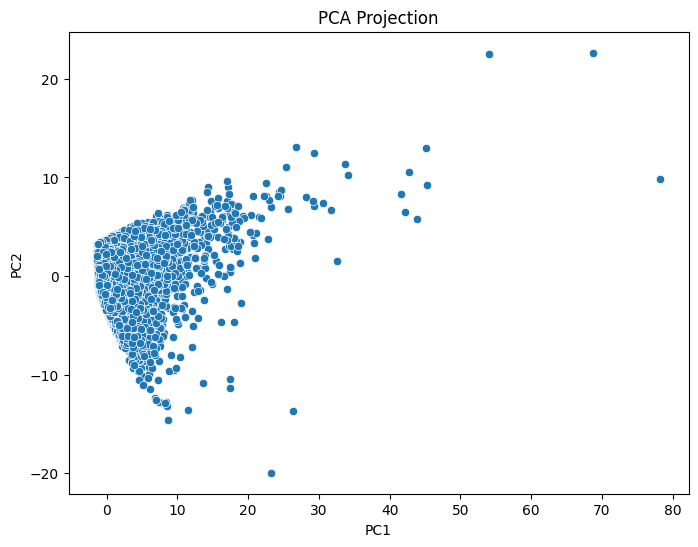

In [290]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', palette='Set2')
plt.title('PCA Projection')
plt.show()

#### Observations:
In the visualization, some points can be seen that are very distant, appearing to be atypical or outliers. In order to conduct a more robust analysis and identify clusters with distinctive behavioral patterns, these points will be removed from the K-MEANS model training process.

**It was decided to exclude from the analysis the records with PC1 < 10.**

Number of Users Excluded: 266


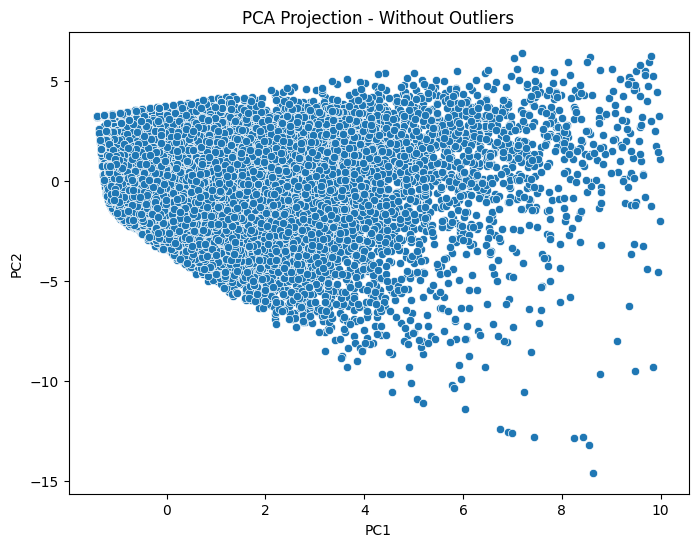

In [291]:
# Exclude possible outliers from the clustering analisys
users_df['PC1'] = pca_df['PC1']
users_df['PC2'] = pca_df['PC2']
users_df_without_out = users_df[users_df['PC1'] < 10]

# Print number of users excluded
excluded = users_df.shape[0] - users_df_without_out.shape[0]
print('Number of Users Excluded:',excluded)

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=users_df_without_out, x='PC1', y='PC2', palette='Set2')
plt.title('PCA Projection - Without Outliers')
plt.show()


In [292]:
# Preprocessing again
X = users_df_without_out[features].fillna(0)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Elbow method to find optimal number of clusters

2
3
4
5
6
7
8
9
10


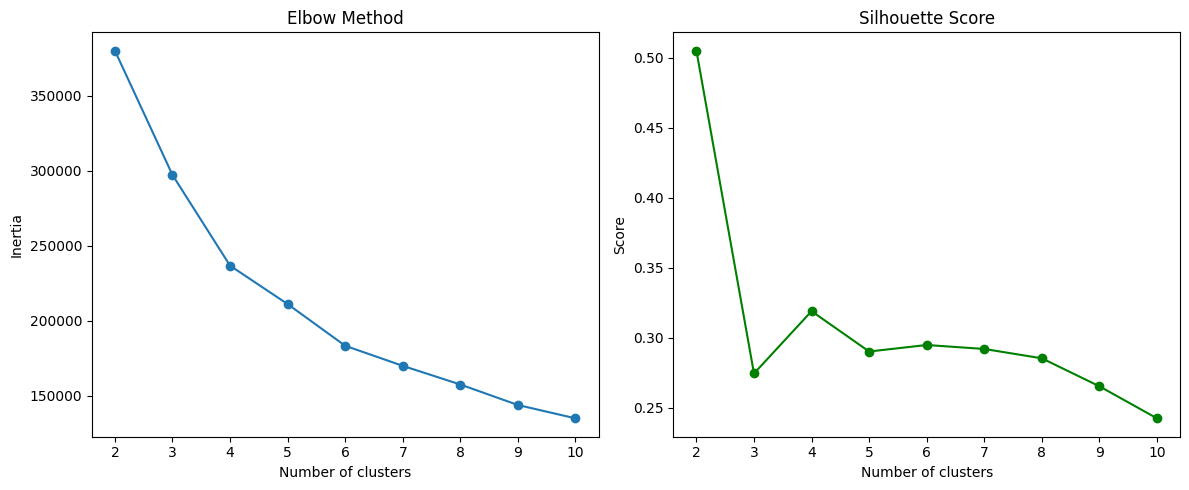

In [293]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Test different numbers of clusters
inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    print(k)

# Plot elbow curve and silhouette scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K_range, sil_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

###Fit final KMeans with chosen number of clusters

In [130]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
users_df_without_out['cluster'] = kmeans.fit_predict(X_scaled)

### Visualize clusters in 2D PCA space

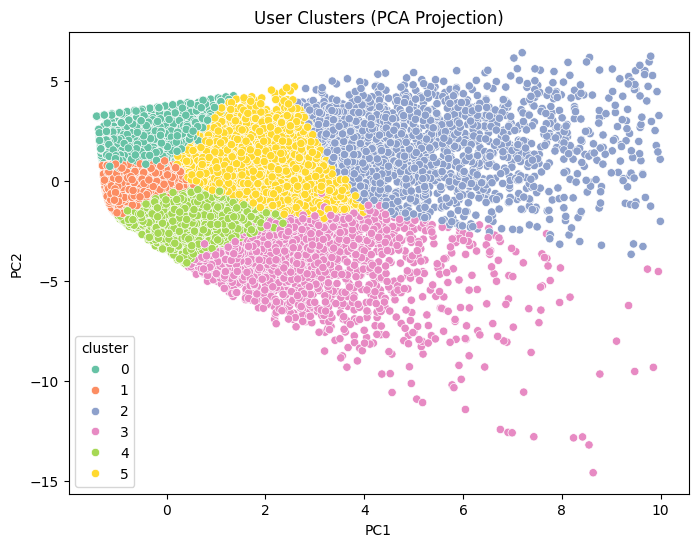

In [131]:
from sklearn.decomposition import PCA

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=users_df_without_out, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title('User Clusters (PCA Projection)')
plt.show()

### Analyze cluster profiles

In [132]:
# Get the mean of each feature per cluster to understand behaviors
cluster_profiles = users_df_without_out.groupby('cluster')[features].mean()

# Add count of users per cluster
cluster_sizes = users_df_without_out['cluster'].value_counts().sort_index()
cluster_profiles['user_count'] = cluster_sizes

# Display cluster summary
display(cluster_profiles)

,unique_songs,play_count_sum,play_count_mean,play_count_max,play_count_sd,top_artist_ratio,top3_songs_ratio,user_count
cluster,,,,,,,,
0,7.06,18.48,2.53,6.69,2.20,0.59,0.75,14403
1,16.07,31.95,1.96,5.72,1.39,0.26,0.42,35046
2,23.46,278.92,14.27,77.11,19.98,0.42,0.62,2020
3,142.75,442.32,3.65,29.39,4.43,0.14,0.16,2351
4,56.50,132.39,2.50,12.35,2.36,0.17,0.22,13218
5,21.60,129.21,6.57,31.84,8.21,0.35,0.57,9049


In [133]:
# Final clusters (merge 5 and 2 in the same cluster)
users_df_without_out['cluster'] = np.where(users_df_without_out['cluster'] == 5, 2, users_df_without_out['cluster'])

# Get the mean of each feature per cluster to understand behaviors
cluster_profiles = users_df_without_out.groupby('cluster')[features].mean()

# Add count of users per cluster
cluster_sizes = users_df_without_out['cluster'].value_counts().sort_index()
cluster_profiles['user_count'] = cluster_sizes

# Display cluster summary
display(cluster_profiles)

,unique_songs,play_count_sum,play_count_mean,play_count_max,play_count_sd,top_artist_ratio,top3_songs_ratio,user_count
cluster,,,,,,,,
0,7.06,18.48,2.53,6.69,2.20,0.59,0.75,14403
1,16.07,31.95,1.96,5.72,1.39,0.26,0.42,35046
2,21.94,156.53,7.97,40.10,10.35,0.36,0.58,11069
3,142.75,442.32,3.65,29.39,4.43,0.14,0.16,2351
4,56.50,132.39,2.50,12.35,2.36,0.17,0.22,13218


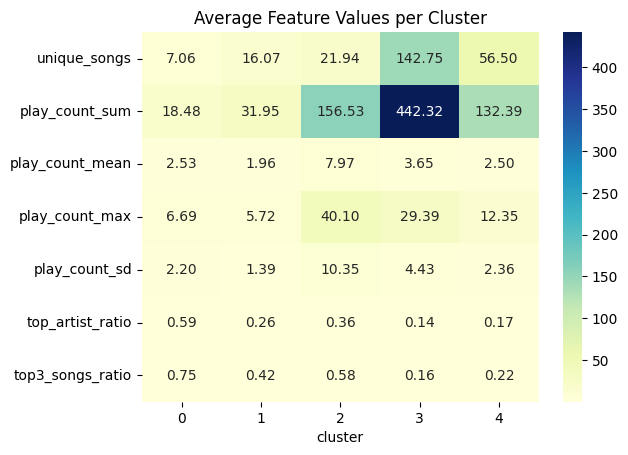

In [134]:
# Visualize cluster summary
sns.heatmap(cluster_profiles.drop('user_count', axis=1).T, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Average Feature Values per Cluster")
plt.show()

### Observations:
After creating key user-level variables to understand the behavioral patterns that differentiate them, six well-defined user segments were identified.

|Cluster|Name|Description|
|-----------|-----------|-----------|
|0|	🎧 Focused Repeater|	Users who listen to a few songs many times. High loyalty to the top artist and strong concentration on the top 3 songs.|
|1|	🔄 Casual Explorers|	Users with more unique songs, low play counts, and lower loyalty. They seem to use the app in a lighter and more varied way.|
|2 & 5|	🔁 Heavy Repeat Listeners| High play count concentrated on a few songs. High intensity, high repetition, but still some diversity.|
|3|	🌍 Diverse Explorers|	Users with very high diversity (many songs), but low loyalty. They listen a lot, but in a scattered way.|
|4|	🔬 Moderate Explorers| Mixed behavior: good diversity, moderate intensity, low loyalty. Fairly balanced users.|

<br></br>
**Recommendation Strategies by Cluster**
<br></br>

***0. Focused Repeater***

* **Model: Content-Based Filtering** (It's not necessary to retrain with the cluster data; the already developed algorithm is used.)

* Reinforce favorites

* Recommend similar songs to their top 3 (same genre, artist collaborations, acoustic/tempo similarity)

* Include subtle novelty like remixes or live versions

***1. Casual Explorers***

* **Model: Popularity-Based Recommendation Systems**

* Offer short, varied playlists

* Recommend trending or popular songs

* Low personalization needed; focus on freshness

***2. Heavy Repeat Listeners***

* **Model: Hybrid (SVD or User-User Based or CoClustering + Content-Based Filtering)**

* Recommend variations of their favorite songs

* Use matrix factorization to find hidden similarities

* Focus on repetition-friendly content

***3. Diverse Explorers***

* **Model: Hybrid (SVD or User-User Based or CoClustering + Content-Based Filtering)**

* Suggest high-diversity playlists

* Prioritize novelty and discovery

* Highlight lesser-known songs in genres they like

***4.Moderate Explorers***

**Model: Hybrid (SVD or User-User Based or CoClustering + Popularity-Based Recommendation Systems)**

* Balance between familiar and new tracks

* Personalize moderately based on genre and play history

* Adapt to evolving tastes



In [135]:
# Create a data frame with clusters refferences
user_cluster_references = users_df_without_out[['user_id', 'cluster']]

# Merge cluster info into df_final using user_id
df_with_cluster = merged_df.merge(
    user_cluster_references,  # DataFrame with user_id and cluster
    on='user_id',             # Join key
    how='left'                # Keep all rows from df_final
)

# Print
df_with_cluster.head()

,user_id,song_id,play_count,title,release,artist_name,year,year_replaced,cluster
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,"2,003.00",4.00
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,"1,976.00",4.00
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,"2,007.00",4.00
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,"2,005.00",4.00
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,"1,999.00",4.00


In [136]:
# Print number of users and songs without clusters
print('Number of users and songs without cluster:',df_with_cluster['cluster'].isna().sum())

Number of users and songs without cluster: 9800


In [137]:
# Print distribution of clusters
df_with_cluster['cluster'].value_counts().sort_index()

,count
cluster,
0.00,101671
1.00,563286
2.00,242827
3.00,335608
4.00,746808


# Develop of New Models for Each Cluster

#### **Cluster 1**
We will identify the most popular songs within this cluster and recommend them equally to all users.

In [138]:
# Casual Explorers
cluster_1 = df_with_cluster[df_with_cluster['cluster'] == 1]

# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_play_count = cluster_1.groupby(['song_id'])['play_count'].mean()

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
count_play_count = cluster_1.groupby('song_id')['play_count'].count()

# Making a dataframe with the average_count and play_freq
final_play_count_c1  = pd.DataFrame({'avg_play_count': average_play_count, 'play_count_count': count_play_count})

# Get the list of top song IDs
top_songs = list(top_n_songs(final_play_count_c1, n = 10, min_interaction = 100))

# Filter the song_df to include only the songs in the top_songs list
top_songs_info_c1 = song_df[song_df['song_id'].isin(top_songs)][['song_id', 'title', 'artist_name']]

# Reorder the filtered DataFrame to match the order of song_ids in top_songs
top_songs_info_c1 = top_songs_info_c1.set_index('song_id').loc[top_songs].reset_index()

# Reset index
final_play_count_c1 = final_play_count_c1.reset_index()

# Merge with top_songs_info
top_songs_info_c1 = top_songs_info_c1.merge(
    final_play_count_c1,
    on='song_id',
    how='left'
)

# Rename columns
top_songs_info_c1.rename(columns={
    'play_count_count': 'n_users',
    'avg_play_count': 'avg_plays_per_user'
}, inplace=True)

# Print final result
top_songs_info_c1

,song_id,title,artist_name,avg_plays_per_user,n_users
0,SOSJSSU12A6D4F8F41,Victoria (LP Version),Old 97's,4.16,106
1,SOVIZNF12AF72A710A,The Big Gundown,The Prodigy,4.03,120
2,SOIKQFR12A6310F2A6,Lord I Guess I'll Never Know,The Verve,3.72,119
3,SONDKOF12A6D4F7D70,Recado Falado (Metrô Da Saudade),Alceu Valença,3.63,117
4,SOPTPWD12A6D4FBD4E,Le Soir,Line Renaud,3.59,156
5,SOCHWPT12AB0184F15,Girl Money,Kix,3.57,116
6,SOIMTII12A6D4F662A,Reign Of The Tyrants,Jag Panzer,3.54,134
7,SOZVVRE12A8C143150,Greece 2000,Three Drives,3.53,317
8,SOBONKR12A58A7A7E0,You're The One,Dwight Yoakam,3.52,2401
9,SODCNEE12A6310E037,Sorrow (1997 Digital Remaster),David Bowie,3.45,139


#### **Cluster 2**
We will test the CoClustering, user-user collaborative filtering, and SVD algorithms in users and songs from the cluster 2. We will not test item-item, as it previously showed the worst performance.
The algorithm with the lowest RMSE and highest F1-SCORE will be selected.

In [139]:
# Heavy Repeat Listeners
cluster_2 = df_with_cluster[df_with_cluster['cluster'] == 2]

# Top play_count in 5
cluster_2['play_count'] = np.where(cluster_2['play_count'] > 5, 5, cluster_2['play_count'])

# Distribution of play_count with top application
cluster_2['play_count'].value_counts().sort_index()

,count
play_count,
1,88631
2,31758
3,18146
4,12515
5,91777


In [140]:
# Reader
reader = Reader(rating_scale = (0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(cluster_2[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)

# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline_c2 = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline_c2.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
print('CoClustering')
print('')
precision_recall_at_k(clust_baseline_c2)

CoClustering

RMSE: 1.7884
Precision:  0.668
Recall:  0.904
F_1 score:  0.768


In [141]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user_c2 = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_c2.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
print('User-User')
print('')
precision_recall_at_k(sim_user_user_c2)

User-User

RMSE: 1.9243
Precision:  0.667
Recall:  0.912
F_1 score:  0.77


In [142]:
# Build baseline model using svd
# Using SVD matrix factorization. Use random_state = 1
svd_c2 = SVD(random_state = 1)

# Training the algorithm on the trainset
svd_c2.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
print('SVD')
print('')
precision_recall_at_k(svd_c2)

SVD

RMSE: 1.6646
Precision:  0.664
Recall:  0.972
F_1 score:  0.789


In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30, 40], 'lr_all': [0.001, 0.005, 0.01, 0.015],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

In [143]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized_c2 = SVD(n_epochs = 40, lr_all = 0.015, reg_all = 0.4, random_state = 1)

# Train the algorithm on the trainset
svd_optimized_c2 = svd_optimized_c2.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized_c2)

RMSE: 1.6512
Precision:  0.665
Recall:  0.974
F_1 score:  0.79


#### **Cluster 3**
We will test the CoClustering, user-user collaborative filtering, and SVD algorithms in users and songs from the cluster 3. We will not test item-item, as it previously showed the worst performance.
The algorithm with the lowest RMSE and highest F1-SCORE will be selected.

In [144]:
# Cluster 3
cluster_3 = df_with_cluster[df_with_cluster['cluster'] == 3]

# Top play_count in 5
cluster_3['play_count'] = np.where(cluster_3['play_count'] > 5, 5, cluster_3['play_count'])

# Distribution of play_count with top application
cluster_3['play_count'].value_counts().sort_index()

,count
play_count,
1,178374
2,56118
3,26347
4,15567
5,59202


In [145]:
# Reader
reader = Reader(rating_scale = (0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(cluster_3[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline_c3 = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline_c3.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
print('CoClustering')
print('')
precision_recall_at_k(clust_baseline_c3)

CoClustering

RMSE: 1.4324
Precision:  0.557
Recall:  0.629
F_1 score:  0.591


In [146]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user_c3 = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_c3.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
print('User-User')
print('')
precision_recall_at_k(sim_user_user_c3)

User-User

RMSE: 1.5250
Precision:  0.555
Recall:  0.651
F_1 score:  0.599


In [147]:
# Build baseline model using svd
# Using SVD matrix factorization. Use random_state = 1
svd_c3 = SVD(random_state = 1)

# Training the algorithm on the trainset
svd_c3.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
print('SVD')
print('')
precision_recall_at_k(svd_c3)

SVD

RMSE: 1.3762
Precision:  0.559
Recall:  0.649
F_1 score:  0.601


In [ ]:
# Set the parameter space to tune for the winner algoritm
param_grid = {'n_epochs': [10, 20, 30, 40], 'lr_all': [0.001, 0.005, 0.01, 0.015],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

In [148]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized_c3 = SVD(n_epochs = 40, lr_all = 0.015, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_optimized_c3 = svd_optimized_c3.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized_c3)

RMSE: 1.3500
Precision:  0.571
Recall:  0.672
F_1 score:  0.617


#### **Cluster 4**
We will test the CoClustering, user-user collaborative filtering, and SVD algorithms in users and songs from the cluster 4. We will not test item-item, as it previously showed the worst performance.
The algorithm with the lowest RMSE and highest F1-SCORE will be selected.

In [149]:
# Cluster 4
cluster_4 = df_with_cluster[df_with_cluster['cluster'] == 4]

# Take random sample to reduce the number of observations
cluster_4 = cluster_4.sample(frac=0.4)

# Top play_count in 5
cluster_4['play_count'] = np.where(cluster_4['play_count'] > 5, 5, cluster_4['play_count'])

# Distribution of play_count with top application
cluster_4['play_count'].value_counts().sort_index()

,count
play_count,
1,178507
2,48100
3,21635
4,12063
5,38418


In [150]:
# Reader
reader = Reader(rating_scale = (0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(cluster_4[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42)
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline_c4 = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline_c4.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
print('CoClustering')
print('')
precision_recall_at_k(clust_baseline_c4)

CoClustering

RMSE: 1.4146
Precision:  0.445
Recall:  0.667
F_1 score:  0.534


In [151]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user_c4 = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_c4.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
print('User-User')
print('')
precision_recall_at_k(sim_user_user_c4)

User-User

RMSE: 1.5456
Precision:  0.444
Recall:  0.707
F_1 score:  0.545


In [152]:
# Build baseline model using svd
# Using SVD matrix factorization. Use random_state = 1
svd_c4 = SVD(random_state = 1)

# Training the algorithm on the trainset
svd_c4.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
print('SVD')
print('')
precision_recall_at_k(svd_c4)

SVD

RMSE: 1.3180
Precision:  0.445
Recall:  0.777
F_1 score:  0.566


In [153]:
# Popularity based in cluster 4

# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_play_count = cluster_4.groupby(['song_id'])['play_count'].mean()

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
count_play_count = cluster_4.groupby('song_id')['play_count'].count()

# Making a dataframe with the average_count and play_freq
final_play_count_c4 = pd.DataFrame({'avg_play_count': average_play_count, 'play_count_count': count_play_count})

# Get the list of top song IDs
top_songs = list(top_n_songs(final_play_count_c4, n = 10, min_interaction = 100))

# Filter the song_df to include only the songs in the top_songs list
top_songs_info_c4 = song_df[song_df['song_id'].isin(top_songs)][['song_id', 'title', 'artist_name']]

# Reorder the filtered DataFrame to match the order of song_ids in top_songs
top_songs_info_c4 = top_songs_info_c4.set_index('song_id').loc[top_songs].reset_index()

# Reset index
final_play_count_c4 = final_play_count_c4.reset_index()

# Merge with top_songs_info
top_songs_info_c4 = top_songs_info_c1.merge(
    final_play_count_c4,
    on='song_id',
    how='left'
)

# Rename columns
top_songs_info_c4.rename(columns={
    'play_count_count': 'n_users',
    'avg_play_count': 'avg_plays_per_user'
}, inplace=True)

# Print final result
top_songs_info_c4

,song_id,title,artist_name,avg_plays_per_user,n_users,avg_plays_per_user,n_users
0,SOSJSSU12A6D4F8F41,Victoria (LP Version),Old 97's,4.16,106,3.68,79
1,SOVIZNF12AF72A710A,The Big Gundown,The Prodigy,4.03,120,3.34,71
2,SOIKQFR12A6310F2A6,Lord I Guess I'll Never Know,The Verve,3.72,119,2.89,37
3,SONDKOF12A6D4F7D70,Recado Falado (Metrô Da Saudade),Alceu Valença,3.63,117,3.60,40
4,SOPTPWD12A6D4FBD4E,Le Soir,Line Renaud,3.59,156,3.20,44
5,SOCHWPT12AB0184F15,Girl Money,Kix,3.57,116,3.09,34
6,SOIMTII12A6D4F662A,Reign Of The Tyrants,Jag Panzer,3.54,134,2.95,40
7,SOZVVRE12A8C143150,Greece 2000,Three Drives,3.53,317,3.17,163
8,SOBONKR12A58A7A7E0,You're The One,Dwight Yoakam,3.52,2401,3.17,645
9,SODCNEE12A6310E037,Sorrow (1997 Digital Remaster),David Bowie,3.45,139,3.00,23


##**Design of the Pipeline to Use**
Three functions were developed to implement the pipeline for generating personalized song recommendations based on the user's behavior profile.

  **1. recommendations_content_based:**
  This function recommends the top 5 songs most similar to a given reference song, using text-based information extracted from the song title, album name, and artist name. It is used to retrieve the top 5 most similar songs for each of the user's top 3 most listened songs.
  
  **2. calculate_cluster:**
  For a given user, this function computes the behavioral features required by a pre-trained K-Means model (with 6 clusters). It scales the variables using a previously fitted scaler, predicts the corresponding cluster, and then merges clusters 2 and 5 into a single group (cluster 2). The output is a single-row DataFrame containing the user’s behavioral variables and the assigned cluster.

  **3. recommendation_by_profile:**
  Based on the user's assigned cluster and listening history, this function generates a personalized set of song recommendations tailored to each group. By default, it returns 10 recommended songs per user

In [272]:
# Function that takes in song title as input and returns the top 5 recommended songs
def recommendations_content_based(title, similar_songs, n_songs=5):

    recommended_songs = []

    # Getting the index of the song that matches the title
    indices = pd.Series(df_small.index)
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_5_indexes = list(score_series.iloc[1 : (n_songs+1)].index)

    # Extract the recommended song IDs
    recommended_song_ids = df_small['song_id'].iloc[top_5_indexes].values

    # Filter the songs from song_df that match the recommended IDs
    recommended_songs_info = song_df.loc[song_df['song_id'].isin(recommended_song_ids),['song_id','title', 'release', 'artist_name','year']]

    # Sort the songs based on the original recommendation order
    recommended_songs_info['song_id'] = pd.Categorical(recommended_songs_info['song_id'], categories=recommended_song_ids, ordered=True)
    recommended_songs_info = recommended_songs_info.sort_values('song_id').reset_index(drop=True)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_5_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs, recommended_songs_info

In [282]:
# Function for calculate cluster of the user
def calculate_cluster(user_id, count_df):

  # Calculate features to calculate the cluster of the user

  count_df_user = count_df.loc[count_df['user_id'] == user_id]
  merged_df_user = pd.merge(count_df_user, song_df[['song_id', 'title', 'release', 'artist_name', 'year','year_replaced']], on='song_id', how='left').drop_duplicates(subset=['song_id', 'user_id'])

   # User-level feature calculation
  users_df_calculate = merged_df_user.groupby(['user_id']).agg(
      unique_songs = ('play_count', 'count'),
      play_count_sum = ('play_count', 'sum'),
      play_count_mean = ('play_count', 'mean'),
      play_count_max = ('play_count', 'max'),
      play_count_sd = ('play_count', 'std'),
  ).reset_index()

  # Number of unique artists listened to by each user
  artist_nunique = merged_df_user.groupby('user_id')['artist_name'].nunique().rename('unique_artists')

  # Most listened artist and the proportion of total plays it represents
  top_artist = merged_df_user.groupby(['user_id', 'artist_name'])['play_count'].sum().reset_index()
  top_artist = top_artist.sort_values(['user_id', 'play_count'], ascending=[True, False])
  top_artist_rank = top_artist.groupby('user_id').first().rename(columns={
      'artist_name': 'top_artist',
      'play_count': 'top_artist_play_count'
  })
  top_artist_rank['top_artist_ratio'] = top_artist_rank['top_artist_play_count'] / merged_df_user.groupby('user_id')['play_count'].sum()

  # % of total plays represented by top 3 songs
  top_songs = merged_df_user.groupby(['user_id', 'song_id'])['play_count'].sum().reset_index()
  top_songs = top_songs.sort_values(['user_id', 'play_count'], ascending=[True, False])
  top3_ratio = (top_songs.groupby('user_id').head(3)
                .groupby('user_id')['play_count'].sum() / merged_df_user.groupby('user_id')['play_count'].sum()).rename('top3_songs_ratio')

  # Merge all features into the original user-level DataFrame
  users_df_calculate = users_df_calculate.merge(top_artist_rank[['top_artist', 'top_artist_ratio']], on='user_id') \
                  .merge(top3_ratio, on='user_id')

  features = [
    'unique_songs', 'play_count_sum', 'play_count_mean',
    'play_count_max', 'play_count_sd',
    'top_artist_ratio', 'top3_songs_ratio'
  ]

  # Extract X Values
  X = users_df_calculate[features].fillna(0)  # Fill missing values if any

  # Scaled
  X_scaled = scaler.transform(X)

  # Make cluster prediction
  users_df_calculate['cluster'] = kmeans.predict(X_scaled)
  users_df_calculate['cluster'] = np.where(users_df_calculate['cluster'] == 5, 2, users_df_calculate['cluster'])

  # If songs are excluded from the train dataset to content based, used cluster None
  count_df_user = count_df_user.loc[count_df_user['song_id'].isin(df_final['song_id'].unique())]
  if count_df_user.shape[0] <= 2:
    users_df_calculate['cluster'] = None

  return users_df_calculate

In [273]:
# Function for personalize recommendations
def recommendation_by_profile(cluster, user_id, count_df):

  # Cluster 0
  if cluster == 0:
    # Detect songs listened by the user
    count_df_user = count_df.loc[count_df['user_id'] == user_id]
    # Use the songs which was used in the train process
    count_df_user = count_df_user.loc[count_df_user['song_id'].isin(df_final['song_id'].unique())]
    # Calculate the number of play count
    top_songs = count_df_user.groupby(['user_id', 'song_id'])['play_count'].sum().reset_index()
    # Order
    top_songs = top_songs.sort_values(['user_id', 'play_count'], ascending=[True, False])
    # Select top 3 songs with most play count
    top_3_songs = top_songs.groupby('user_id').head(3)
    # Obtein name of the songs
    top_3_songs = pd.merge(top_3_songs, song_df[['song_id', 'title']], on='song_id', how='left').drop_duplicates(subset=['song_id', 'user_id'])

    # Recommendations for any song
    recommendation_to_user_0 = recommendations_content_based(top_3_songs['title'].iloc[0], similar_songs, n_songs = 10)[1]
    recommendation_to_user_1 = recommendations_content_based(top_3_songs['title'].iloc[1], similar_songs, n_songs = 10)[1]
    recommendation_to_user_2 = recommendations_content_based(top_3_songs['title'].iloc[2], similar_songs, n_songs = 10)[1]

    # Concat 3 recommendations
    all_recommendations = pd.concat([
        recommendation_to_user_0,
        recommendation_to_user_1,
        recommendation_to_user_2
    ])

    # Drop duplicates
    unique_recommendations = all_recommendations.drop_duplicates(subset='title')

    # Drop songs listening in the past
    unique_recommendations = unique_recommendations[~unique_recommendations['song_id'].isin(count_df_user['song_id'])].reset_index()

    # Select top 10
    top_10_recommendations = unique_recommendations.head(10)

    return top_10_recommendations[['song_id', 'title', 'artist_name']]

  # Cluster 1
  elif cluster == 1:
    return top_songs_info_c1[['song_id', 'title', 'artist_name']]

  # Cluster 2:
  elif cluster == 2:
    # Detect songs listened by the user
    count_df_user = count_df.loc[count_df['user_id'] == user_id]
    # Use the songs which was used in the train process
    count_df_user = count_df_user.loc[count_df_user['song_id'].isin(df_final['song_id'].unique())]
    # Calculate the number of play count
    top_songs = count_df_user.groupby(['user_id', 'song_id'])['play_count'].sum().reset_index()
    # Order
    top_songs = top_songs.sort_values(['user_id', 'play_count'], ascending=[True, False])
    # Select top 3 songs with most play count
    top_3_songs = top_songs.groupby('user_id').head(3)
    # Obtein name of the songs
    top_3_songs = pd.merge(top_3_songs, song_df[['song_id', 'title']], on='song_id', how='left').drop_duplicates(subset=['song_id', 'user_id'])

    # Recommendations for any song
    recommendation_to_user_0 = recommendations_content_based(top_3_songs['title'].iloc[0], similar_songs)[1]
    recommendation_to_user_1 = recommendations_content_based(top_3_songs['title'].iloc[1], similar_songs)[1]
    recommendation_to_user_2 = recommendations_content_based(top_3_songs['title'].iloc[2], similar_songs)[1]

    # Concat 3 recommendations
    all_recommendations = pd.concat([
        recommendation_to_user_0,
        recommendation_to_user_1,
        recommendation_to_user_2
    ])

    # Drop duplicates
    unique_recommendations = all_recommendations.drop_duplicates(subset='title')

    # Drop songs listening in the past
    unique_recommendations = unique_recommendations[~unique_recommendations['song_id'].isin(count_df_user['song_id'])]

    # Best 5 content based recommendations
    top_5_recommendations = unique_recommendations.head(5)

    #############################################################

    # Calculate recommendations with SVD
    data = count_df.loc[count_df['user_id'] == user_id]
    recommendations = get_recommendations(data, user_id, 5, svd_optimized_c2)

    # Convert into dataframe
    top_recommendations_svd = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

    # Get information for this songs
    top_recommendations_svd = top_recommendations.merge(song_df[['song_id', 'title', 'artist_name']], on='song_id', how='left')

    # Concat both recommendations
    top_recommendations_final = pd.concat([top_5_recommendations[['song_id', 'title', 'artist_name']], top_recommendations_svd[['song_id', 'title', 'artist_name']]])

    return top_recommendations_final

  # Cluster 3:
  elif cluster == 3:
    # Detect songs listened by the user
    count_df_user = count_df.loc[count_df['user_id'] == user_id]
    # Use the songs which was used in the train process
    count_df_user = count_df_user.loc[count_df_user['song_id'].isin(df_final['song_id'].unique())]
    # Calculate the number of play count
    top_songs = count_df_user.groupby(['user_id', 'song_id'])['play_count'].sum().reset_index()
    # Order
    top_songs = top_songs.sort_values(['user_id', 'play_count'], ascending=[True, False])
    # Select top 3 songs with most play count
    top_3_songs = top_songs.groupby('user_id').head(3)
    # Obtein name of the songs
    top_3_songs = pd.merge(top_3_songs, song_df[['song_id', 'title']], on='song_id', how='left').drop_duplicates(subset=['song_id', 'user_id'])

    # Recommendations for any song
    recommendation_to_user_0 = recommendations_content_based(top_3_songs['title'].iloc[0], similar_songs)[1]
    recommendation_to_user_1 = recommendations_content_based(top_3_songs['title'].iloc[1], similar_songs)[1]
    recommendation_to_user_2 = recommendations_content_based(top_3_songs['title'].iloc[2], similar_songs)[1]

    # Concat 3 recommendations
    all_recommendations = pd.concat([
        recommendation_to_user_0,
        recommendation_to_user_1,
        recommendation_to_user_2
    ])

    # Drop duplicates
    unique_recommendations = all_recommendations.drop_duplicates(subset='title')

    # Drop songs listening in the past
    unique_recommendations = unique_recommendations[~unique_recommendations['song_id'].isin(count_df_user['song_id'])]

    # Best 5 content based recommendations
    top_5_recommendations = unique_recommendations.head(5)

    #############################################################

    # Calculate recommendations with SVD
    data = count_df.loc[count_df['user_id'] == user_id]
    recommendations = get_recommendations(data, user_id, 5, svd_optimized_c3)

    # Convert into dataframe
    top_recommendations_svd = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

    # Get information for this songs
    top_recommendations_svd = top_recommendations.merge(song_df[['song_id', 'title', 'artist_name']], on='song_id', how='left')

    # Concat both recommendations
    top_recommendations_final = pd.concat([top_5_recommendations[['song_id', 'title', 'artist_name']], top_recommendations_svd[['song_id', 'title', 'artist_name']]])

    return top_recommendations_final

  # Cluster 4:
  elif cluster == 4:

    #############################################################

    # Calculate recommendations with user - user
    data = count_df.loc[count_df['user_id'] == user_id]
    recommendations = get_recommendations(data, user_id, 5, sim_user_user_c4)

    # Convert into dataframe
    top_recommendations_user_user = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

    # Get information for this songs
    top_recommendations_user_user = top_recommendations.merge(song_df[['song_id', 'title', 'artist_name']], on='song_id', how='left')

    # Concat both recommendations
    top_recommendations_final = pd.concat([top_songs_info_c4[['song_id', 'title', 'artist_name']].head(5), top_recommendations_user_user[['song_id', 'title', 'artist_name']]])

    return top_recommendations_final

  else:
    return top_songs_info[['song_id', 'title', 'artist_name']]


## **Examples**
One user from each cluster is randomly selected to demonstrate how the pipeline works.

In [172]:
# Take the sample
sample_1 = pd.DataFrame(cluster_1['user_id'].sample(1))
sample_2 = pd.DataFrame(cluster_2['user_id'].sample(1))
sample_3 = pd.DataFrame(cluster_3['user_id'].sample(1))
sample_4 = pd.DataFrame(cluster_4['user_id'].sample(1))
sample = pd.concat([sample_1,sample_2,sample_3,sample_4])
sample

,user_id
1472553,0eb749490afbd6640b82306858ee97a8ae288d43
1771748,8cd3fae4a01df761fbacd99b1584494b84f4ec09
1321145,adc4734df10064dca11978f396af6dc4f77a9bfa
1903356,cea83c7cc1d7b7ee8b3243a384bc54bdf9cf4379


## **Example 1**

In [188]:
# User id variable
user_id_example = sample['user_id'].iloc[0]

# What songs was listening?
count_df_user = count_df.loc[count_df['user_id'] == user_id_example]
# Calculate the number of play count
top_songs = count_df_user.groupby(['user_id', 'song_id'])['play_count'].sum().reset_index()
# Order
top_songs = top_songs.sort_values(['user_id', 'play_count'], ascending=[True, False])
# Select top 3 songs with most play count
top_3_songs = top_songs.groupby('user_id').head(3)
# Obtein name of the songs
top_3_songs = pd.merge(top_3_songs, song_df[['song_id', 'title','artist_name']], on='song_id', how='left').drop_duplicates(subset=['song_id', 'user_id'])
# Print head
top_3_songs

,user_id,song_id,play_count,title,artist_name
0,0eb749490afbd6640b82306858ee97a8ae288d43,SOZSFWF12A6D4F93D5,17,Let's Get It On,Marvin Gaye
1,0eb749490afbd6640b82306858ee97a8ae288d43,SOLDJLX12A6D4F9A78,7,Last Cup Of Sorrow,Faith No More
2,0eb749490afbd6640b82306858ee97a8ae288d43,SOEUZJO12A8151E080,6,Runaway,3 Doors Down


In [189]:
# Calculate cluster
cluster_info = calculate_cluster(user_id_example, count_df)
cluster_info

,user_id,unique_songs,play_count_sum,play_count_mean,play_count_max,play_count_sd,top_artist,top_artist_ratio,top3_songs_ratio,cluster
0,0eb749490afbd6640b82306858ee97a8ae288d43,31,75,2.42,17,3.14,Marvin Gaye,0.23,0.40,1


In [197]:
# Calculate reccomendations
recommendation_by_profile(cluster = cluster_info['cluster'].iloc[0], user_id = user_id_example, count_df = count_df)

,song_id,title,artist_name
0,SOSJSSU12A6D4F8F41,Victoria (LP Version),Old 97's
1,SOVIZNF12AF72A710A,The Big Gundown,The Prodigy
2,SOIKQFR12A6310F2A6,Lord I Guess I'll Never Know,The Verve
3,SONDKOF12A6D4F7D70,Recado Falado (Metrô Da Saudade),Alceu Valença
4,SOPTPWD12A6D4FBD4E,Le Soir,Line Renaud
5,SOCHWPT12AB0184F15,Girl Money,Kix
6,SOIMTII12A6D4F662A,Reign Of The Tyrants,Jag Panzer
7,SOZVVRE12A8C143150,Greece 2000,Three Drives
8,SOBONKR12A58A7A7E0,You're The One,Dwight Yoakam
9,SODCNEE12A6310E037,Sorrow (1997 Digital Remaster),David Bowie


## **Example 2**

In [198]:
# User id variable
user_id_example = sample['user_id'].iloc[1]

# What songs was listening?
count_df_user = count_df.loc[count_df['user_id'] == user_id_example]
# Calculate the number of play count
top_songs = count_df_user.groupby(['user_id', 'song_id'])['play_count'].sum().reset_index()
# Order
top_songs = top_songs.sort_values(['user_id', 'play_count'], ascending=[True, False])
# Select top 3 songs with most play count
top_3_songs = top_songs.groupby('user_id').head(3)
# Obtein name of the songs
top_3_songs = pd.merge(top_3_songs, song_df[['song_id', 'title','artist_name']], on='song_id', how='left').drop_duplicates(subset=['song_id', 'user_id'])
# Print head
top_3_songs

,user_id,song_id,play_count,title,artist_name
0,8cd3fae4a01df761fbacd99b1584494b84f4ec09,SOPSOHT12A67AE0235,14,Almaz,Randy Crawford
1,8cd3fae4a01df761fbacd99b1584494b84f4ec09,SOHTKMO12AB01843B0,12,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon
2,8cd3fae4a01df761fbacd99b1584494b84f4ec09,SOQZYQH12A8AE468E5,10,Better To Reign In Hell,Cradle Of Filth


In [199]:
# Calculate cluster
cluster_info = calculate_cluster(user_id_example, count_df = count_df)
cluster_info

,user_id,unique_songs,play_count_sum,play_count_mean,play_count_max,play_count_sd,top_artist,top_artist_ratio,top3_songs_ratio,cluster
0,8cd3fae4a01df761fbacd99b1584494b84f4ec09,9,65,7.22,14,4.58,Randy Crawford,0.22,0.55,2


In [200]:
# Calculate reccomendations
recommendation_by_profile(cluster = cluster_info['cluster'].iloc[0], user_id = user_id_example, count_df = count_df)

,song_id,title,artist_name
0,SOWWCNJ12A81C1FFA5,Every Little Thing She Does Is Magic,The Police
1,SOQAJHW12AB0186004,Every Lasting Light,The Black Keys
2,SOBDVAK12AC90759A2,Daisy And Prudence,Erin McKeown
3,SOIXKRK12A8C140BD1,Who Let You Go?,The Killers
4,SOBZFSZ12A8C13F2CA,Under The Gun,The Killers
0,SOHEMBB12A6701E907,Superman,Eminem / Dina Rae
1,SOUGCDK12AC95F075F,Never Let You Go,Justin Bieber
2,SOEMUXL12A58A7B848,Rehab,Rihanna
3,SOLRDEI12A8C13AAA2,Ms. Jackson,OutKast
4,SONQSBF12AF72ABB86,Thrills,LCD Soundsystem


##**Example 3**

In [201]:
# User id variable
user_id_example = sample['user_id'].iloc[2]

# What songs was listening?
count_df_user = count_df.loc[count_df['user_id'] == user_id_example]
# Calculate the number of play count
top_songs = count_df_user.groupby(['user_id', 'song_id'])['play_count'].sum().reset_index()
# Order
top_songs = top_songs.sort_values(['user_id', 'play_count'], ascending=[True, False])
# Select top 3 songs with most play count
top_3_songs = top_songs.groupby('user_id').head(3)
# Obtein name of the songs
top_3_songs = pd.merge(top_3_songs, song_df[['song_id', 'title','artist_name']], on='song_id', how='left').drop_duplicates(subset=['song_id', 'user_id'])
# Print head
top_3_songs

,user_id,song_id,play_count,title,artist_name
0,adc4734df10064dca11978f396af6dc4f77a9bfa,SOBZCTQ12AB0183220,11,Love,Simian Mobile Disco
1,adc4734df10064dca11978f396af6dc4f77a9bfa,SONJNEQ12A6D4F9EB6,11,Phantom,Justice
2,adc4734df10064dca11978f396af6dc4f77a9bfa,SOLJHUB12A58A78151,10,Let´s Buy Happiness,Boys Noize


In [202]:
# Calculate cluster
cluster_info = calculate_cluster(user_id_example, count_df = count_df)
cluster_info

,user_id,unique_songs,play_count_sum,play_count_mean,play_count_max,play_count_sd,top_artist,top_artist_ratio,top3_songs_ratio,cluster
0,adc4734df10064dca11978f396af6dc4f77a9bfa,207,357,1.72,11,1.44,Octopus Project,0.09,0.09,3


In [203]:
# Calculate reccomendations
recommendation_by_profile(cluster = cluster_info['cluster'].iloc[0], user_id = user_id_example, count_df = count_df)

,song_id,title,artist_name
0,SOPEGMI12AF72AA77F,Hotdog,Simian Mobile Disco
3,SONTNHB12A8C1391D6,Clock,Simian Mobile Disco
0,SOAIILB12A58A776F7,Phantom Part 1.5 (Album Version),Justice
1,SOUZDWT12B0B80BC62,Phantom Limb (Album),The Shins
3,SOCEWVG12A8C13DCC2,Newjack,Justice
0,SOHEMBB12A6701E907,Superman,Eminem / Dina Rae
1,SOUGCDK12AC95F075F,Never Let You Go,Justin Bieber
2,SOEMUXL12A58A7B848,Rehab,Rihanna
3,SOLRDEI12A8C13AAA2,Ms. Jackson,OutKast
4,SONQSBF12AF72ABB86,Thrills,LCD Soundsystem


##**Example 4**

In [204]:
# User id variable
user_id_example = sample['user_id'].iloc[3]

# What songs was listening?
count_df_user = count_df.loc[count_df['user_id'] == user_id_example]
# Calculate the number of play count
top_songs = count_df_user.groupby(['user_id', 'song_id'])['play_count'].sum().reset_index()
# Order
top_songs = top_songs.sort_values(['user_id', 'play_count'], ascending=[True, False])
# Select top 3 songs with most play count
top_3_songs = top_songs.groupby('user_id').head(3)
# Obtein name of the songs
top_3_songs = pd.merge(top_3_songs, song_df[['song_id', 'title','artist_name']], on='song_id', how='left').drop_duplicates(subset=['song_id', 'user_id'])
# Print head
top_3_songs

,user_id,song_id,play_count,title,artist_name
0,cea83c7cc1d7b7ee8b3243a384bc54bdf9cf4379,SOEQJBS12A8AE475A4,13,The Funeral (Album Version),Band Of Horses
1,cea83c7cc1d7b7ee8b3243a384bc54bdf9cf4379,SOTGIKV12AB0182176,9,Take A Ride,Yuksek
2,cea83c7cc1d7b7ee8b3243a384bc54bdf9cf4379,SOZQASV12A6D4F87CB,9,Masculine Eclipse,The Beautiful South


In [232]:
# Calculate cluster
cluster_info = calculate_cluster(user_id_example,count_df = count_df)
cluster_info

In [206]:
# Calculate reccomendations
recommendation_by_profile(cluster = cluster_info['cluster'].iloc[0], user_id = user_id_example,count_df = count_df)

,song_id,title,artist_name
0,SOSJSSU12A6D4F8F41,Victoria (LP Version),Old 97's
1,SOVIZNF12AF72A710A,The Big Gundown,The Prodigy
2,SOIKQFR12A6310F2A6,Lord I Guess I'll Never Know,The Verve
3,SONDKOF12A6D4F7D70,Recado Falado (Metrô Da Saudade),Alceu Valença
4,SOPTPWD12A6D4FBD4E,Le Soir,Line Renaud
0,SOHEMBB12A6701E907,Superman,Eminem / Dina Rae
1,SOUGCDK12AC95F075F,Never Let You Go,Justin Bieber
2,SOEMUXL12A58A7B848,Rehab,Rihanna
3,SOLRDEI12A8C13AAA2,Ms. Jackson,OutKast
4,SONQSBF12AF72ABB86,Thrills,LCD Soundsystem


#**Validation**

To validate the effectiveness of the recommendation strategy, the dataset is divided into two parts: a "historical" subset used to generate recommendations based on the defined strategy, and a "prediction" subset to assess whether users eventually listened to any of the recommended songs. If the recommender system is efficient, we would expect a high percentage of the recommended songs to have been listened to.

This approach aligns with standard practices in recommender system evaluation, where historical data is used to train the model, and subsequent data is used to test its predictive performance. Such methods help in assessing the model's ability to generalize and provide relevant recommendations to users. ​

In [285]:
# Select 50 random user_id
sample = pd.DataFrame(count_df['user_id'].drop_duplicates().sample(300))

# Split df_sample_history and df_sample_pred
df_sample_history = count_df.sample(frac=0.8, random_state=42)
df_sample_pred = count_df.drop(df_sample_history.index)

In [286]:
# Loop to verify coincidences between recommendations and listening

recommendations_validation = pd.DataFrame()

for i in range(sample.shape[0]):

  # Obtein user_id
  user_id_example = sample['user_id'].iloc[i]

  if user_id_example in df_sample_history['user_id'].unique():
    cluster_info = calculate_cluster(user_id_example, count_df = df_sample_history)
    cluster_user = cluster_info['cluster'].iloc[0]
  else:
    cluster_user = None

  # Calculated recommendations
  recommendation_user = recommendation_by_profile(cluster = cluster_user, user_id = user_id_example, count_df = df_sample_history)

  # Add information to do the validation
  recommendation_user['user_id'] = user_id_example
  recommendation_user['cluster'] = cluster_user
  recommendation_user['listened'] = np.where(recommendation_user['song_id'].isin(df_sample_pred.loc[df_sample_pred['user_id'] == user_id_example]['song_id']), 1, 0)

  recommendations_validation = pd.concat([recommendations_validation, recommendation_user])

# Print head
recommendations_validation.head()

,song_id,title,artist_name,user_id,cluster,listened
0,SOSJSSU12A6D4F8F41,Victoria (LP Version),Old 97's,bcd217df61634ad8a4d3cbff570bf8ce751dbe9e,1,0
1,SOVIZNF12AF72A710A,The Big Gundown,The Prodigy,bcd217df61634ad8a4d3cbff570bf8ce751dbe9e,1,0
2,SOIKQFR12A6310F2A6,Lord I Guess I'll Never Know,The Verve,bcd217df61634ad8a4d3cbff570bf8ce751dbe9e,1,0
3,SONDKOF12A6D4F7D70,Recado Falado (Metrô Da Saudade),Alceu Valença,bcd217df61634ad8a4d3cbff570bf8ce751dbe9e,1,0
4,SOPTPWD12A6D4FBD4E,Le Soir,Line Renaud,bcd217df61634ad8a4d3cbff570bf8ce751dbe9e,1,0


In [287]:
# Create a summarized analysis of validations
validation_analysis = recommendations_validation.groupby(['cluster']).agg(
    Count = ('listened', 'count'),
    Listened = ('listened', 'sum'),
    Listened_Pct = ('listened','mean')
).reset_index()

# Print Results
validation_analysis

,cluster,Count,Listened,Listened_Pct
0,0,130,5,0.04
1,1,730,2,0.00
2,2,250,4,0.02
3,3,60,3,0.05
4,4,500,1,0.00


#### Observations:
​It's possible that this validation test is too demanding or not fully representative of the development environment, which may explain why the results are not very encouraging. If a higher percentage of the recommended songs had been listened to, we might be able to assert that the recommendations are appropriate. However, the percentage of recommended songs that were actually listened to is very low across all behavioral groups.

## **Conclusion and Recommendations / First part of the project (Milestone)**

  Although this was the first exploration aimed at proposing a solution, it was not the one we decided to implement. We opted for personalized strategies based on user behavior profiles within the app (cluster-based segmentation). Nevertheless, we present the results of this initial approach as a learning experience.

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:

In this project, we built recommendation systems using five different algorithms. They are as follows:

  - **Popularity-Based Recommendation Systems**
  - **User User Similarity-Based Collaborative Filtering**
  - **Item Item Similarity-Based Collaborative Filtering**
  - **Clustering-Based Recommendation Systems**
  - **Content-Based Recommendation Systems**

To demonstrate clustering-based recommendation systems, **surprise** library has been used. Grid search cross-validation is applied to find the best working model, and with that the corresponding predictions are made.

To evaluate the performance of these models, **precision@k and recall@k** are used in this case study. Using these two metrics F_1 score is calculated for each working model.

We can try to improve the performance of these models using hyperparameter tuning.

**Model Performance:**

|Model|RMSE|F1 Score|
|-----------|-----------|-----------|
|user-user|1,0878|0,504|
|user-user optimized|1,0582|0,503|
|item-item|1,0394|0,397|
|item-item optimized|1,0398|0,418|
|svd|1,0252|0,498|
|svd optimized|1,008|0,499|
|cluster|1,0487|0,472|
|cluster optimized|1,0487|0,472|

The optimized SVD model is the best candidate for production use, as it combines excellent prediction accuracy with a competitive F1 Score.




**2. Refined insights**:

* User listening behavior varies significantly, with some users listening to the same song many times, while others listen only once. This affects how the model should interpret and predict play count.

* The development sample showed users with lower average play counts than the original dataset, which could impact generalizability if not properly accounted for.

* Among all tested models, the optimized SVD model achieved the best balance between low RMSE and a competitive F1 Score, making it the strongest individual model in terms of predictive accuracy.

* Despite the individual performance of each model, different algorithms tend to recommend different songs, indicating that each captures unique aspects of user-song interactions. This opens the door to designing a hybrid recommendation strategy that leverages multiple models.

* Content-based models tend to recommend songs from the same artist or similar artists, which can be a strong signal when the collaborative filtering models diverge too much.

* New or inactive users benefit more from rank-based and content-based models, as they don’t rely on past interaction data.

**3. Proposal for the final solution design:**

We propose adopting the optimized SVD model as the core of the final recommendation system. This model demonstrated the best balance between prediction accuracy (lowest RMSE) and a competitive F1 Score, making it a solid individual performer for predicting user-song interactions.

However, to enhance recommendation robustness across different user behaviors, especially in edge cases (e.g., new or inactive users), we suggest incorporating a **hybrid recommendation strategy** combining the following:

* **Collaborative filtering (optimized SVD + user-based and item-based models):** These models capture interaction patterns and provide personalized recommendations based on listening history.

* **Content-based filtering:** Useful when collaborative data is sparse or when multiple collaborative models provide divergent recommendations. Content-based methods can suggest songs from the same artist or similar styles based on the last song played.

* **Rank-based models:** These can provide fallback recommendations based on global popularity, particularly valuable for new users with no interaction history.

To combine these approaches effectively, we propose a voting or consensus mechanism:

1. From the top 10 recommendations of each model, prioritize songs that appear in multiple model outputs.

2. In cases with no overlap, prioritize the content-based recommendation from the user's last listened track.

This hybrid approach enhances both accuracy and diversity, and is more resilient to variability in user profiles and interaction patterns.


**Other alternatives:**

* A set of user profiles could be designed to segment users based on their typical listening behavior, and for each segment, different models could be trained and applied. For example:

  - **Users with varied taste** (who listen to many different types of songs, but only a few times each)

  - **Users with regular taste** (who frequently listen to a small set of similar songs)

  - **Intermediate users** (who listen to many songs, many times)

* Another suggestion is to detect **behavioral patterns based on the time of day or day of the week**.

  **For example:** listening to rock in the morning, relaxing music at night, or party music on weekends.

  By combining this information with the user’s profile and the specific time context (day and time), much more accurate and contextual recommendations could be made.